[![Open In Binder](https://static.mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/OleBo/MathSo/main?filepath=/notebooks/Numerik.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OleBo/MathSo/blob/main/notebooks/Numerik.ipynb)


[browse](http://colab.research.google.com/github/OleBo/MathSo/)

# Numerik

## Einleitung

### Was ist Numerik?

-   Numerische Mathematik befasst sich damit, für mathematisch
    formulierte Probleme einen rechnerischen Lösungsweg zu finden.

-   Solch ein rechnerischer Lösungsweg heißt **Algorithmus**:
    eine für alle möglichen Eingabedaten eindeutig festgelegte Abfolge
    elementarer Rechenoperationen (inkl. Auswertung logischer
    Bedingungen und mathematischer Funktionen).

-   Numerik kommt zum Einsatz, wenn eine analytische Lösung nicht
    möglich ist oder diese in einer für die Berechnung unbrauchbaren
    Form vorliegt.

-   Interdisziplinär: Mathematik (Analysis, Lineare Algebra),
    Informatik, Anwendungen z.B. in den Wirtschafts- oder
    Naturwissenschaften

### Vom Problem zur Lösung

-   **Modellierung:** Formulierung des Anwendungsproblems als
    mathematisches Modell, idealisierte Annahmen

-   **Realisierung:** Wahl der Lösungsmethode/des Algorithmus,
    Implementierung, Suche/Entwicklung geeigneter Software,
    Datenorganisation, Visualisierung

-   **Validierung:** Überprüfen des Modells auf seine Gültigkeit, des
    Programms auf seine Zuverlässigkeit, des numerischen Verfahrens auf
    seine Stabilität; falls möglich, Fehlerabschätzung für konkrete
    Rechnungen

### Vom Problem zur Lösung: Beispiel

1. **Anwendungsproblem**: Bewertung von Finanzoptionen
2. **Finanzmath. Modell**: Black-Scholes-Modell
3. **Mathematisches Modell**: Partielle Differentialgleichung
4. **Numerisches Verfahren**: Diskretisierung: z.B. finite Differenzen,numerische Methoden für Systemegewöhnlicher Differentialgleichungen
5. **Algorithmus**: Ablauf der einzelnen Rechenschritte
6. **Programm**: Programmiersprache, Eigene oder Fremdsoftware, Ein- und Ausgabe, Datenorganisation, Visualisierung
7. **Rechnung**: Simulation mit konkreten Eingabedaten, Visualisierung
8. **Fehleranalyse**: Abschätzung für die konkreten Daten, Konvergenztests

### Fehlerarten

-   Bei der Implementierung auf einem Computer ist zu bedenken:

    -   Die zur Verfügung stehende *Zahlenmenge* ist endlich, die
        Rechengenauigkeit daher begrenzt.

    -   Der *Speicher* ist endlich, reelle Funktionen können z.B. nur
        approximativ dargestellt werden.

    -   Die *Rechenzeit* ist beschränkt, das Problem kann daher oft nur
        näherungsweise (approximativ) gelöst werden.

-   Dies führt zu verschiedenen Arten von Fehlern:

    -   **Rundungsfehler** durch endliche Maschinengenauigkeit

    -   **Diskretisierungsfehler** durch endliche Approximation

    -   **Verfahrensfehler** durch bei der Konstruktion des
        Algorithmus angenommene Vereinfachungen

-   Daneben können auch die **Eingabedaten** mit Fehlern behaftet
    sein, z.B. Messfehler oder Fehler statistischer Natur.

-   Die Abschätzung des Einflusses dieser Fehler auf das Ergebnis ist
    eine wichtige Aufgabe der Numerik.
    
<img src="figs/notebook.png" alt="notebook"
	title="Beispiel für Rundungsfehler" width="50" height="50" />

#### Beispiel zu Rundungsfehlern

Approximiere $\lim_{x\to 0} f(x)$ mit
$$f(x) := \frac{1-\cos x}{x^2}$$
durch Auswertung für $x=10^{-n}$, $n=1,2,\ldots$

In [1]:
import numpy as np

def f(x):
    return (1. - np.cos(x))/x**2

x = np.array([10**(-n) for n in range(1,10)])
y = f(x)
print("{:<6} {:<15}".format("x", "f(x)"))
for xk, yk in zip(x, y):
    print("{:<6.0e} {:<15}".format(xk, yk))

x      f(x)           
1e-01  0.49958347219742893
1e-02  0.4999958333473664
1e-03  0.49999995832550326
1e-04  0.4999999969612645
1e-05  0.5000000413701854
1e-06  0.5000444502911705
1e-07  0.4996003610813205
1e-08  0.0            
1e-09  0.0            


### Absoluter und relativer Fehler

\begin{definition}

Sei $x\in\mathbb{R}$ und $\tilde x$ ein Näherungswert für $x$. Dann
heißen 
$$\delta_x := \tilde x - x$$
**absoluter Fehler** von $x$ und, falls $x\neq 0$,
$$\varepsilon_x := \frac{\tilde x - x}{x}$$
**relativer Fehler** von $x$.
\end{definition}

\begin{example}(Analysis 2)

$x:=40! = 8.15915\cdot 10^{47}$, und die Stirling-Formel liefert den
Näherungswert $\tilde x = 8.14217\cdot 10^{47}$.

Der relative Fehler ist $\varepsilon_x = 2.081\cdot 10^{-3}$, der
absolute Fehler $\delta_x = 1.698\cdot 10^{45}$.
\end{example}

In [2]:
from math_so.utils import absolute_error, relative_error
value =8.15915e47
approx=8.14217e47
print('absolute error: {}'.format(absolute_error(value, approx)))
print('relative error: {}'.format(relative_error(value, approx)))

absolute error: 1.6980000000000836e+45
relative error: 0.0020810991341010813


In [3]:
print(absolute_error.__doc__)

This function will calculate the absolute error:

    .. math:: \epsilon = \left|v - v_{approx}\right|
        :label: absolute_error

    :value: some value :math:`v`
    :approx: :math:`v_{approx}` approximation of :math:`v`
    :returns: absolute error :math:`\epsilon` according equation :eq:
    `absolute_error`
    


In [4]:
print(relative_error.__doc__)

This function will calculate the relative error:

    .. math:: \eta = \left|\frac{v - v_{approx}}{v}\right|
        :label: relative_error

    This is also the normalized absolute error (see equation :eq:
    `absolute_error`). There are two features that should be kept in mind:

    - Relative error is undefined when the true value is zero as it appears in
      the denominator.
    - Relative error only makes sense when measured on a ratio scale, (i.e. a
      scale which has a true meaningful zero), otherwise it would be sensitive
      to the measurement units.

    :value: some value :math:`v`
    :approx: :math:`v_{approx}` approximation of :math:`v`
    :returns: relative error :math:`\eta` according equation :eq:
    `relative_error`
    


## Computerarithmetik und Fehlerrechnung

### Zahldarstellung

Daten oder Werte können auf verschiedene Arten dargestellt werden. Dazu verwendet man z.B. Ziffern. In der Dezimalschreibweise verwendet man Ziffern von 0 bis 9. Das Dezimalsystem ist ein **Stellenwertsystem** (die Position einer Ziffer spielt eine Rolle bei dem Wert der entsteht: $145\ne541$).

Zerlegung einer Dezimalzahl:

$145=1*100+4*10+5*1$

$145=1*10^2+4*10^1+5*10^0$

Basis: $p=10$ --> $\{0,1,2,3,4,5,6,7,8,9\}$

Das Dezimalsystem ist ein Stellenwertsystem mit der Basis 10. Es gibt weitere Stellenwertsysteme: z.B. Binärsystem mit Basis $p=2$ --> $\{0,1\}$, Oktalsystem mit Basis $p=8$ --> $\{0,1,3,4,5,6,7\}$, Hexadezimalsystem mit Basis $p=16$ --> $\{0,1,3,4,5,6,7,8,9,A,B,C,D,E,F\}$.

Die Basis gibt immer an wieviele Zeichen in einem System zur Verfügung stehen.

Zerlegung einer Dezimalzahl (allgemein):

$w=\sum_{i=0}^{n-1}z_i*10^i$

Das lässt sich auch für andere Basen schreiben und für Rationale Zahlen verallgemeinern ...

\begin{theorem}(p-adische Darstellung)\label{theo:p-adisch}

Sei $b\in\mathbb{N}$, $b>1$ eine vorgegebene **Basis**. Dann lässt
sich jede reelle Zahl $x$ im **Stellenwertsystem** zur Basis $b$
(oder auch: **$b$-adischen Zahlensystem**) eindeutig schreiben
als

$$x = \sum_{k=-\infty}^n a_k b^k =: (a_n a_{n-1} \ldots a_1 a_0 \, . \, a_{-1} a_{-2} \ldots)_b$$

für ein $n\in\mathbb{Z}$. Hierbei heißen $0 \leqslant a_k < b$ die
**Ziffern**, $a_n a_{n-1} \ldots a_1 a_0$ die
**Vorkommastellen** und $a_{-1} a_{-2} \ldots$ die
**Nachkommastellen**.

Für $p=10$ erhält man das **Dezimalsystem**, für $p=2$ das
**Dualsystem**.
\end{theorem}

\begin{example}
$20.21 = (20.21)_{10} = (10100.001101 \ldots)_2$
\end{example}

<img src="figs/tafel.png" alt="Tafel"
	title="Umrechnung zwischen verschiedenen Basen" width="50" height="50" />

Eine sehr grosse oder sehr kleine Dezimalzahl kann durch die Gleitkommadarstellung vereinfacht dargestellt werden. Man multipliziert dabei die Mantisse (Vorzahl) mit einer Zehnerpotenz. Dabei normiert man die Mantisse so, dass die Mantisse $1\le m\le 10$ ist. Verallgemeinert mit Basis $b$ lässt sich folgendes definieren: 

\begin{definition}(Gleitkommadarstellung)\label{def:Gleitkommadarstellung}

Zur Basis $b$ läßt sich jede reelle Zahl $x$ schreiben als
$$x = s \cdot m \cdot b^e$$ mit dem **Vorzeichen** $s=\pm 1$, der
**Mantisse** $m\in\mathbb{R}$, $1\leqslant m < b$ und dem
**Exponenten** $e\in\mathbb{Z}$.
\end{definition}

\begin{example}

$\begin{aligned}
     &&20.21 = + 2.021 \cdot 10^1 \\
     &&= (10100.001101 \ldots)_2 = (+ 1.0100001101\ldots \cdot 2^{100})_2,      
\end{aligned}$
  
wobei wir auch den Exponenten im Dualsystem geschrieben haben: 

$e = (100)_2 = (4)_{10}$.
\end{example}

Maschinenzahlen spielen dort eine Rolle, wo es nur endlich viele Möglichkeiten gibt Dinge zu speichern. Das ist z.B. im Computer der Fall (endlicher Speicher). Eine wesentliche Idee bei Maschinenzahlen ist es die Zahlendarstellung zu Vereinheitlichen (Standartformat). Dazu müssen wir uns festlegen, wie lang bestimmte Elemente sein dürfen. 

\begin{definition}(Maschinenzahlen)\label{def:Maschinenzahlen}

Computer basieren auf dem Dualsystem ($b=2$) und reservieren für jede
Zahl eine feste Speichergröße:

- Vorzeichen: $s = (-1)^S$, $S\in\{0,1\}$, 1 Bit für $S$
- Mantisse: $m = 1 + M/2^p$, $M\in\{0,1,\ldots2^p-1\}$, $p$ Bits für $M$
- Exponent: $e = E - B$, $E\in\{0,1,\ldots,2^r-1\}$ , $r$ Bits für $E$

wobei der **Bias** $B=2^{r-1}-1$ gewählt wird, so dass gleich
viele positive wie negative Exponenten gespeichert werden können.
So erhält man den **Raum der Maschinenzahlen** $M(2,p,r)$.
Analog für andere Basen $b$.
\end{definition}

\begin{example}In $M(2,8,4)$ gilt für $(20.21)_{10} = (1.0100001101\ldots \cdot 2^{100})_2$: 

$\begin{aligned}
    s = +1 \; &\Rightarrow& \; S = (0)_2 \\
    m = (1.01000011\ldots)_2 \; &\Rightarrow& M = (01000011)_2 \\
    e = (100)_2 = (4)_{10}, \; B = (7)_{10} \; &\Rightarrow& \; E = e + B = (11)_{10} = (1011)_2
\end{aligned}$
\end{example}
\begin{theorem}(Beschränkungen der Maschinenzahlen)

a)  Die kleinste Maschinenzahl im $M(2,p,r)$, die größer als $1$ ist,
    erhält man für
    $$E = B, \, M = 1 \; \Rightarrow \; x = 1 + 2^{-p} =: 1 + 2\mathsf{eps},$$
    wobei $\mathsf{eps}:= 2^{-p-1}$ **Maschinengenauigkeit**
    heißt.

b)  Die größte Zahl in $M(2,p,r)$ erhält man für
    $$E = 2^r - 1, \, M = 2^p - 1 \; \Rightarrow \; x = (2 - 2^{-p}) \, 2^{2^{r-1}} =: \mathsf{realmax}.$$

c)  Die betragsmäßig kleinste Zahl in $M(2,p,r)$ erhält man für[^4]
    $$E = 0, M = 0 \; \Rightarrow \; x = 2^{-2^{r-1} + 1} =: \mathsf{realmin}.$$

In der IEEE 754-Norm (s.u.) ist $E = 0$ für Sonderfälle vorbehalten, so dass $realmin = 2^{−2^{r−1}+2}$.
\end{theorem}

<img src="figs/tafel.png" alt="Tafel"
	title="Erläuterungen" width="50" height="50" />

\begin{definition}(IEEE 754-Norm)\label{def:IEEE754}

In der Norm IEEE 754 (Institute of Electrical and Electronic Engineers,
1985/1989) werden u.a. folgende Datentypen festgelegt:
\end{definition}

In [5]:
import pandas as pd
d = {
    "r": pd.Series([4, 8, 11], index=["M(2,8,4)","single", "double"]),
    "p": pd.Series([8,23, 52], index=["M(2,8,4)","single", "double"]),
    "ieee": pd.Series([False,True,True], index=["M(2,8,4)","single", "double"]),
}
df=pd.DataFrame(d)
df['size [bit]']=1+df.r+df.p
df['eps']=1/2**(df.p+1)
df['realmax']=(2-2.0**-df.p)*2**2**(df.r-1)
df['realmin']=2**(-2.0**(df.r-1)+1+df.ieee)
df

,r,p,ieee,size [bit],eps,realmax,realmin
"M(2,8,4)",4,8,False,13,1.953125e-03,511.0,7.812500e-03
single,8,23,True,32,5.960464e-08,0.0,1.175494e-38
double,11,52,True,64,1.110223e-16,0.0,2.225074e-308


<img src="figs/notebook.png" alt="notebook"
	title="Gleitkommazahlen in Python" width="50" height="50" />

#### Gleitkommazahlen in Python

Beispiele: $x = 3.45\cdot 10^{67}$, $y = 1.23\cdot 10^{-4}$

In [6]:
import sys
sys.float_info.epsilon?

In [7]:
x = 3.45e67  
y = 1.23e-4
print(x, y)

3.45e+67 0.000123


Der von Python standardmäßig verwendete Datentyp ``float`` entspricht dem IEEE-754-Standard ``double``.

Beispiel: Maschinengenauigkeit

In [8]:
x = 2e-16
1+x

1.0000000000000002

In [9]:
1 + .5*x #nicht mehr von 1 unterscheidbar

1.0

Beispiel: größte darstellbare Zahl 

In [10]:
1e308

1e+308

In [11]:
2e308

inf

\begin{definition}(Runden)\label{def:Runden} 

Bei arithmetischen Rechenoperationen in $M(b,p,r)$ wird das Ergebnis $x$
auf einen eindeutig definierten Wert $\mathsf{rd}(x)\in M(b,p,r)$
gerundet.

I.A. ist dies die Zahl in $M(b,p,r)$ mit dem kleinsten Abstand zu $x$
*(round to nearest)*.\

Falls diese Vorschrift nicht eindeutig ist, gibt es verschiedene
Möglichkeiten (Auf-/Abrunden). Gemäß IEEE 754 (mit $b=2$) wird dann die
Zahl gewählt, deren letzte Mantissenstelle $0$ ist *(ties to even)*.
\end{definition}

<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel" width="50" height="50" />
    
\begin{theorem}(Rundungsfehler)\label{theo:Rundungsfehler}

Es gilt
$\mathsf{rd}(x) = x(1 + \varepsilon)$ mit
$|\varepsilon| \leqslant \mathsf{eps}$,\
d.h. für den *relativen* Rundungsfehler gilt
$|\varepsilon_x| \leqslant \mathsf{eps}$.
\end{theorem}

Um Rundungsfehler deutlicher zu sehen, importieren wir eine Hilfsfunktion, die auf $p$ signifikante Dezimalstellen rundet:

In [12]:
from math_so.utils import signif
print(signif.__doc__)

Rounding a number to n significant digits.

    Rounds a number and includes only the desired number of significant digits.

    Use `round(number, ndigits)` with `number` as the number being rounded
    and `ndigits` as the number of significant digits minus
    `(int(math.floor(math.log10(abs(number)))) - 1)`.
    


In [13]:
#Beispiel
print(signif(0.0012345, 3))
print(signif(-1234.5, 3))
print(signif(0, 3))

0.00123
-1230.0
0.0


## Fehlerfortpflanzung

<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel zum Einfluss algebraischer Umformungen auf Rundungsfehler" width="50" height="50" />

Das Folgende gilt allgemein für alle Arten von Fehlern.\

\begin{theorem}(Fehlerfortpflanzung)\label{theo:Fehlerfortpflanzung}

Es seien $x_1$ und $x_2$ fehlerbehaftete Größen. Dann gilt
$$\begin{array}{llll}
      y = x_1 \pm x_2 &\Rightarrow & {\delta_y = \delta_{x_1} \pm \delta_{x_2}}, &
      \varepsilon_y = \dfrac{x_1 \varepsilon_{x_1} \pm x_2 \varepsilon_{x_2}}{x_1\pm x_2} ,\\
      y = x_1 \cdot x_2 &\Rightarrow & \delta_y \doteq x_2 \delta_{x_1} + x_1 \delta_{x_2}, &{\varepsilon_y \doteq \varepsilon_{x_1} + \varepsilon_{x_2}}, \\
      y = \dfrac{x_1}{x_2} &\Rightarrow & \delta_y \doteq \dfrac{x_2 \delta_{x_1} - x_1 \delta_{x_2}}{x_2^2}, & {\varepsilon_y \doteq \varepsilon_{x_1} - \varepsilon_{x_2}},
    \end{array}$$ wobei $\doteq$ die Vernachlässigung quadratischer
Fehlerterme andeutet.
\end{theorem}

Bei Addition (Subtr.) werden also die *absoluten* Fehler addiert
(subtr.),\
bei Multiplikation (Division) die *relativen* Fehler addiert
(subtrahiert).\

<img src="figs/tafel.png" alt="Tafel"
	title="Beweis" width="50" height="50" />

\begin{theorem}(Fehlerfortpflanzung bei Anwendung einer Funktion)\label{theo:FehlerfortpflanzungFunktion}

Es sei $I\subset \mathbb{R}$ ein offenes Intervall, $f:I\to\mathbb{R}$ eine differenzierbare Funktion, $x\in I$ und $y = f(x)$. Dann gilt

a)  $\delta_y = f'(x) \delta_x$

b)  $\varepsilon_y = K_x \varepsilon_x$, wobei
    $K_x := \dfrac{x f'(x)}{f(x)}$ **(relative) Konditionszahl**
    heißt.
\end{theorem}

<img src="figs/tafel.png" alt="Tafel"
	title="Beweis, Beispiel" width="50" height="50" />

Für $|K_x| > 1$ verstärkt sich der relative Fehler bei Anwendung der
Funktion $f$ also, das Problem heißt dann **schlecht konditioniert**.

## Lineare Gleichungssysteme: Direkte Methoden

### Der Gauß-Algorithmus

-   Zu lösen ist ein lineares Gleichungssystem (LGS)
    $$\sum_{k=1}^n a_{ik} x_k = b_i, \quad i=1,2,\ldots,n$$ mit $n$
    Gleichungen in $n$ Unbekannten $x_k$, mit
    $a_{ik}, b_i \in\mathbb{R}$

-   In Matrixform:
    $$Ax = b, \quad A=(a_{ik}) \in\mathbb{R}^{n\times n}, \quad b = (b_i) \in \mathbb{R}^n$$

-   Wir setzen voraus, dass $A$ regulär (invertierbar) ist, so dass eine
    eindeutige Lösung $x\in\mathbb{R}^n$ existiert.

-   Ziel des **Gauß'schen Eliminationsverfahrens** ist, die
    erweiterte Koeffizientenmatrix $(A|b)$ durch elementare
    Zeilenumformungen auf eine obere Dreiecksmatrix zu transformieren:

    -   Multiplikation einer Zeile mit einer Zahl $\neq 0$

    -   Addition eines Vielfachen einer Zeile zu einer anderen

    -   Vertauschung von Zeilen [verwenden wir zunächst noch nicht!]

-   Dabei bleibt der Lösungsraum invariant.

<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel" width="50" height="50" />

\begin{problem}(Gauß’sches Eliminationsverfahren)\label{algo:gaussnaiv}

$$\begin{aligned}
        &a_{ij}^{(0)} = a_{ij}, \quad b_i^{(0)} = b_i\\
        &\text{Für } k=1,\ldots, n-1:\\
        &\qquad \text{Für } i=k+1,\ldots, n:\\
        &\qquad\qquad \ell_{ik} = \frac{a_{ik}^{(k-1)}}{a_{kk}^{(k-1)}}\\
        &\qquad\qquad b_i^{(k)} = b_i^{(k-1)} - \ell_{ik} b_k^{(k-1)}\\
        &\qquad\qquad a_{ik}^{(k)} = 0\\
        &\qquad\qquad \text{Für } j = k+1,\ldots, n:\\
        &\qquad\qquad\qquad a_{ij}^{(k)} = a_{ij}^{(k-1)} - \ell_{ik} a_{kj}^{(k-1)} 
      \end{aligned}$$
\end{problem}


<img src="figs/tafel.png" alt="Tafel"
	title="Herleitung" width="50" height="50" />

Algorithmus \ref{algo:gaussnaiv} ist durchführbar, wenn
$a_{kk}^{(k-1)} \neq 0$ für $k=1, \ldots, n-1$. Dann erhält man im
letzten Schritt 

$$A^{(n-1)} x = b^{(n-1)} =: y$$ 

mit einer oberen Dreiecksmatrix 

$$A^{(n-1)} =: U =  \left( \begin{array}{cccc} 
    u_{11} & u_{12} & \cdots & u_{1n}\\
    0 & u_{22} & \cdots & u_{2n}\\
    \vdots & \ddots & \ddots & \vdots\\
    0 & \cdots & 0 & u_{nn}             
  \end{array} \right).$$ 
  
Das System $Ux = y$ lässt sich nun leicht lösen:

\begin{problem}(Rückwärtssubstitution)\label{algo:Rückwärtssubstitution}

$$\begin{aligned}
      &\text{Für } i = n, n-1, \ldots, 1:\\
      &\qquad x_i = \frac{1}{u_{ii}} \left(y_i
        - \sum_{j=i+1}^n u_{ij} x_j \right)
    \end{aligned}$$
\end{problem}


In der Herleitung von Algorithmus \ref{algo:gaussnaiv} haben wir auch bereits gezeigt:

\begin{theorem}(LU-Zerlegung)\label{theo:LUnaiv}

Ist Algorithmus \ref{algo:gaussnaiv} durchführbar, so erhält man die Zerlegung $A=LU$ mit 

$$L = \left( \begin{array}{ccccc}
        1 & 0 & 0 & \cdots & 0\\
        \ell_{21} & 1 & 0 & \ddots & 0 \\
        \ell_{31} & \ell_{32} & 1 & \cdots & 0 \\
        \vdots & \vdots & \vdots & \ddots & \vdots\\
        \ell_{n-1} & \ell_{n2} & \ell_{n3} & \cdots & 1             
        \end{array} \right), \quad
      U =  \left( \begin{array}{cccc} 
        u_{11} & u_{12} & \cdots & u_{1n}\\
        0 & u_{22} & \cdots & u_{2n}\\
        \vdots & \ddots & \ddots & \vdots\\
        0 & \cdots & 0 & u_{nn}             
      \end{array} \right),$$ 
      
wobei $u_{ij} = a_{ij}^{(n-1)}$ und $\ell_{ik}$ wie in Algorithmus
\ref{algo:gaussnaiv} definiert.
\end{theorem}


Hat man mit der Gauß-Elimination eine Zerlegung $A=LU$ gefunden, so
lässt sich das LGS $Ax=b$ in zwei Schritten lösen:

1.  Vorwärtssubstitution: Löse $Ly = b$ nach $y$

2.  Rückwärtssubstitution: Löse $Ux = y$ nach $x$

Die Vorwärtssubstitution lautet ausgeschrieben:

\begin{problem}(Vorwärtssubstitution)\label{algo:Vorwärtssubstitution}

$$\begin{aligned}
      &\text{Für } i = 1,2, \ldots, n:\\
      &\qquad y_i = \frac{1}{\ell_{ii}} \left( b_i - \sum_{j=1}^{i-1} \ell_{ij} y_j \right)
    \end{aligned}$$
\end{problem}


(Hier haben wir beliebige Diagonalelelemente $\ell_{ii}\neq 0$
zugelassen.)

Algorithmus \ref{algo:gaussnaiv} versagt, wenn $a_{kk}^{(k-1)} = 0$ für ein $k\in\{1, \ldots, n-1\}$. Aber wir haben Zeilenvertauschungen noch nicht ins Spiel gebracht:

\begin{theorem}(Zeilenvertauschung)\label{theo:Zeilenvertauschung}

Für eine reguläre Matrix $A$ existiert vor dem $k$-ten Eliminationsschritt von Algorithmus \ref{algo:gaussnaiv} stets eine Zeilenvertauschung derart, dass danach das $k$-te Diagonalelement $a_{kk}^{(k-1)}$ nicht Null ist.

Dieses bezeichnet man auch als **Pivotelement**.
\end{theorem}

<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel, Beweis" width="50" height="50" />

\begin{problem}(Gauß’sches Eliminationsverfahren mit Zeilenvertauschungen)\label{algo:gaussperm}

$$
\begin{aligned}
      &a_{ij}^{(0)} = a_{ij}, \quad b_i^{(0)} = b_i\\
      &\text{Für } k=1,\ldots, n-1:\\
      &\qquad \text{Wähle Pivot } p_k \in\{k,\ldots, n\} \text{ derart, dass } a_{p_k k}^{(k-1)} \neq 0 \\
      &\qquad \text{Falls } p_k \neq k, \text{ vertausche } a_{kj}^{(k-1)}\leftrightarrow a_{p_k j}^{(k-1)} \text{ für } j=k,\ldots, n,\\
      &\qquad b_k^{(k-1)} \leftrightarrow b_{p_k}^{(k-1)} \text{ und } \ell_{kj}\leftrightarrow\ell_{p_k j}\text{ für } j=1,\ldots,k-1 \\ 
      &\qquad \text{Für } i=k+1,\ldots, n:\\
      &\qquad\qquad \ell_{ik} = \frac{a_{ik}^{(k-1)}}{a_{kk}^{(k-1)}}\\
      &\qquad\qquad b_i^{(k)} = b_i^{(k-1)} - \ell_{ik} b_k^{(k-1)}\\
      &\qquad\qquad a_{ik}^{(k)} = 0\\
      &\qquad\qquad \text{Für } j = k+1,\ldots, n:\\
      &\qquad\qquad\qquad a_{ij}^{(k)} = a_{ij}^{(k-1)} - \ell_{ik} a_{kj}^{(k-1)} 
\end{aligned}
$$
\end{problem}

Satz \ref{theo:LUnaiv} muss entsprechend angepasst werden:

\begin{theorem}(LU-Zerlegung mit Zeilenvertauschungen)\label{theo:LUperm}

Zu jeder regulären Matrix $A$ existieren eine Permutationsmatrix $P$,
eine linke untere Dreiecksmatrix $L$ mit Diagonale $1$ und eine rechte
obere Dreiecksmatrix $U$, so dass 

$$PA = LU.$$
\end{theorem}


Mit Algorithmus \ref{algo:gaussperm} erhält man diese als $U = A^{(n-1)}$, und $L$ ist die Dreiecksmatrix aus den $\ell_{ik}$. Die Permutationsmatrix $P$ erhält man, indem man die Zeilenvertauschungen in der gleichen Reihenfolge auf die Einheitsmatrix anwendet.

Hat man eine Zerlegung $PA=LU$ gefunden, lässt sich das LGS $Ax=b$ in
drei Schritten lösen:

1.  Zeilenvertauschungen der rechten Seite: Setze $b \leftarrow P b$

2.  Vorwärtssubstitution: Löse $Ly = b$ nach $y$

3.  Rückwärtssubstitution: Löse $Ux = y$ nach $x$

In der Praxis kann man anstelle von $P$ auch einfach die Pivotindizes
$p_k$ aus Algorithmus \ref{algo:gaussperm} speichern, dann lautet Schritt 1
ausgeschrieben:

\begin{problem}(Zeilenvertauschungen der rechten Seite)

$$\begin{aligned}
      &\text{Für } k = 1,2, \ldots, n-1:\\
      &\qquad \text{Falls } p_k\neq k: \text{ Vertausche } b_k \leftrightarrow b_{p_k}
    \end{aligned}$$
\end{problem}

#### Pivotstrategien

Wie wählt man im $k$-ten Schritt die Pivotzeile $p_k$? Nicht alle sind
numerisch gleich gut geeignet!\

<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel" width="50" height="50" />

Die **Diagonalstrategie** $p_k = k$ (d.h. keine
Zeilenvertauschungen) ist nur dann anwendbar und numerisch stabil, wenn
$A$ wenigstens **schwach diagonaldominant** ist:

\begin{definition}(Diagonaldominant)\label{def:diagonaldominant}

a)  $A\in\mathbb{R}^{n\times n}$ heißt **strikt diagonaldominant**, falls
    $$|a_{ii}| > \sum_{\substack{k=1,k\neq i}}^n |a_{ik}|, \quad i=1,2,\ldots n.$$

b)  $A$ heißt **schwach diagonaldominant**, falls oben für
    mindestens einen Index $i$ die strenge Ungleichung '>' gilt und für
    die übrigen $\geqslant$.

\end{definition}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%203.pdf)

Zur Vermeidung von Rundungsfehlern nimmt man am besten das betragsmäßig
größte Element einer Spalte als Pivot: **Spaltenmaximumstrategie**
$$\max_{k\leqslant i\leqslant n} |a_{ik}^{(k-1)}| = |a_{p_k k}^{(k-1)}|$$

Noch stabiler ist die **relative Spaltenmaximumstrategie**, wobei
man dasjenige Element einer Spalte als Pivot nimmt, das betragsmäßig
relativ zur Summe der Beträge der Elemente der zugehörigen Zeile am
größten ist:
$$\max_{k\leqslant i\leqslant n} \frac{|a_{ik}^{(k-1)}|}{\sum_{j=k}^n |a_{ij}^{(k-1)}|} = \frac{|a_{p_k k}^{(k-1)}|}{\sum_{j=k}^n |a_{p_k j}^{(k-1)}|}$$

[<img src="figs/notebook.png" alt="Notebook"
	title="Beispiel" width="50" height="50" />](../Numerik/Python/chapter3.ipynb)

Der Gauß-Algorithmus:

In [14]:
def backsubst(U, y, p):
    """Rücksubstitution: Berechnet aus der rechten oberen Dreiecksmatrix U und rechten Seite y die Lösung x und rundet dabei auf p signifikante Dezimalstellen."""
    n = len(y)  #Indizes 0,1,...,n-1
    if not np.shape(U) == (n,n):
        raise Exception("Dimensionen von U und y passen nicht")
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = y[i]
        for k in range(i+1, n):
            x[i] = signif(x[i] - signif(U[i,k]*x[k], p), p)
        x[i] = signif(x[i]/U[i,i], p)
    return np.array([x]).T  #Spaltenvektor

In [15]:
def forwsubst(L, b, p):
    """Vorwärtssubstitution: Berechnet aus der linken unteren Dreiecksmatrix L mit Einsen auf der Diagonale und der rechten Seite b die Zwischenlösung y."""
    n = len(b)  #Indizes 0,1,...,n-1
    if not np.shape(L) == (n,n):
        raise Exception("Dimensionen von L und b passen nicht")
    y = np.zeros(n)
    for i in range(1, n):
        y[i] = b[i]
        for j in range(0, i):
            y[i] = signif(y[i] - signif(L[i,j]*y[j], p), p)
        y[i] = signif(y[i]/L[i,i], p)
    return np.array([y]).T  #Spaltenvektor

Beispiel zum Gauß'schen Eliminationsverfahren:

In [16]:
A = np.array([[2.1, 2512, -2516], [-1.3, 8.8, -7.6], [0.9, -6.2, 4.6]])
b = np.array([[6.5], [-5.3], [2.9]])
Ab = np.concatenate((A, b), axis=1)
print("Erweiterte Koeffizientenmatrix Ab = \n {} \n".format(np.matrix(Ab)))
print()

x_exakt = np.array([[5], [1], [1]])
print("A*x_exakt - b = \n {} \n".format(np.matmul(A, x_exakt) - b))

Erweiterte Koeffizientenmatrix Ab = 
 [[ 2.100e+00  2.512e+03 -2.516e+03  6.500e+00]
 [-1.300e+00  8.800e+00 -7.600e+00 -5.300e+00]
 [ 9.000e-01 -6.200e+00  4.600e+00  2.900e+00]] 


A*x_exakt - b = 
 [[ 0.0000000e+00]
 [ 8.8817842e-16]
 [-4.4408921e-16]] 



Wir probieren verschiedene Pivotstrategien aus und runden dabei auf $p$ Dezimalstellen.

In [17]:
p = 5

Spaltenmaximumstrategie:
In diesem Fall identisch mit der Diagonalstrategie.

In [18]:
#Erster Eliminationsschritt
Ab1 = np.zeros((3,4))
Ab1[0,:] = Ab[0,:]
l10 = signif(Ab[1,0]/Ab[0,0], p)
l20 = signif(Ab[2,0]/Ab[0,0], p)
Ab1[1,1:] = signif(Ab[1,1:] - signif(l10*Ab[0,1:], p), p)
Ab1[2,1:] = signif(Ab[2,1:] - signif(l20*Ab[0,1:], p), p)
print("Ab1 = \n {} \n".format(np.matrix(Ab1)))

Ab1 = 
 [[ 2.1000e+00  2.5120e+03 -2.5160e+03  6.5000e+00]
 [ 0.0000e+00  1.5639e+03 -1.5651e+03 -1.2762e+00]
 [ 0.0000e+00 -1.0828e+03  1.0829e+03  1.1430e-01]] 



In [19]:
#Zweiter Eliminationsschritt
Ab2 = np.zeros((3,4))
Ab2[[0,1],:] = Ab1[[0,1],:]
l21 = signif(Ab1[2,1]/Ab1[1,1], p)
Ab2[2,2:] = signif(Ab1[2,2:] - signif(l21*Ab1[1,2:], p), p)
print("Ab2 = \n {} \n".format(np.matrix(Ab2)))

Ab2 = 
 [[ 2.1000e+00  2.5120e+03 -2.5160e+03  6.5000e+00]
 [ 0.0000e+00  1.5639e+03 -1.5651e+03 -1.2762e+00]
 [ 0.0000e+00  0.0000e+00 -7.0000e-01 -7.6930e-01]] 



In [20]:
#Wir speichern die LU-Zerlegung für später
U = Ab2[0:3,0:3]
L = np.array([[1, 0, 0], [l10, 1, 0], [l20, l21, 1]])

#Rücksubstitution
x_spmax = backsubst(Ab2[:,0:3], Ab2[:,3], p)
print("x = \n {} \n".format(x_spmax))

x = 
 [[5.1905]
 [1.099 ]
 [1.099 ]] 



Relative Spaltenmaximumstrategie:

In [21]:
#Bestimme Quotienten aus Elementen der Spalte 0 und Betragssumme der jeweiligen Zeile
q = [abs(Ab[i,0])/np.sum(abs(Ab[i,0:3])) for i in range(0,3)]
print(q)

[0.00041748672988608577, 0.07344632768361581, 0.07692307692307693]


In [22]:
#Vertausche Zeilen 
Ab1 = Ab[[2,1,0],:]
print("Ab1 = \n {} \n".format(Ab1))

Ab1 = 
 [[ 9.000e-01 -6.200e+00  4.600e+00  2.900e+00]
 [-1.300e+00  8.800e+00 -7.600e+00 -5.300e+00]
 [ 2.100e+00  2.512e+03 -2.516e+03  6.500e+00]] 



In [23]:
#Erster Eliminationsschritt
Ab2 = np.zeros((3,4))
Ab2[0,:] = Ab1[0,:]
l10 = signif(Ab1[1,0]/Ab1[0,0], p)
l20 = signif(Ab1[2,0]/Ab1[0,0], p)
Ab2[1,1:] = signif(Ab1[1,1:] - l10*Ab1[0,1:], p)
Ab2[2,1:] = signif(Ab1[2,1:] - l20*Ab1[0,1:], p)
print("Ab2 = \n {} \n".format(np.matrix(Ab2)))

Ab2 = 
 [[ 9.0000e-01 -6.2000e+00  4.6000e+00  2.9000e+00]
 [ 0.0000e+00 -1.5528e-01 -9.5576e-01 -1.1112e+00]
 [ 0.0000e+00  2.5265e+03 -2.5267e+03 -2.6657e-01]] 



In [24]:
#Bestimme Quotienten aus Elementen der Spalte 1 und Betragssumme der jeweiligen Zeile
q = [abs(Ab2[i,1])/np.sum(abs(Ab2[i,1:3])) for i in range(1,3)] 
print(q)

[0.13976094470046083, 0.49998021055964537]


In [25]:
#Vertausche Zeilen 
Ab3 = Ab2[[0,2,1], :]
print("Ab3 = \n {} \n".format(Ab3))

Ab3 = 
 [[ 9.0000e-01 -6.2000e+00  4.6000e+00  2.9000e+00]
 [ 0.0000e+00  2.5265e+03 -2.5267e+03 -2.6657e-01]
 [ 0.0000e+00 -1.5528e-01 -9.5576e-01 -1.1112e+00]] 



In [26]:
#Zweiter Eliminationsschritt
Ab4 = np.zeros((3,4))
Ab4[[0,1],:] = Ab3[[0,1],:]
l21 = signif(Ab3[2,1]/Ab3[1,1], p)
Ab4[2,2:] = signif(Ab3[2,2:] - signif(l21*Ab3[1,2:], p), p)
print("Ab4 = \n {} \n".format(np.matrix(Ab4)))

Ab4 = 
 [[ 9.0000e-01 -6.2000e+00  4.6000e+00  2.9000e+00]
 [ 0.0000e+00  2.5265e+03 -2.5267e+03 -2.6657e-01]
 [ 0.0000e+00  0.0000e+00 -1.1111e+00 -1.1112e+00]] 



In [27]:
#Rücksubstitution
x_relspmax = backsubst(Ab4[:,0:3], Ab4[:,3], p)
print("x = \n {} \n".format(x_relspmax))

x = 
 [[5.0001]
 [1.0001]
 [1.0001]] 



Deutlich genaueres Ergebnis als mit Spaltenmaximumstrategie!

#### Nachiteration

-   Hat man eine numerische Lösung $\tilde x$ des LGS $Ax=b$ gefunden,
    sollte man die Einsetzprobe machen, indem man den
    **Residuenvektor** bildet: $$r := A\tilde x - b.$$

-   Eine verbesserte Lösung $x$ kann man erhalten, indem man den
    Korrekturansatz $$x = \tilde x + z$$ macht und $z$ so bestimmt, dass
    $x$ das LGS löst:
    $$0 = Ax - b = A(\tilde x + z) - b = A\tilde x + A z - b = Az + r$$

-   Man muss also folgendes LGS nach $z$ lösen: $$Az = -r$$

-   Hat man bereits die LU-Zerlegung von $A$, muss nur die Vor- und
    Rückwärtssubstitution nochmal ausgeführt werden.

<img src="figs/notebook.png" alt="Notebook"
	title="Beispiel" width="50" height="50" />

### Komplexität

Als **Komplexität** eines Algorithmus bezeichnet man die Anzahl
der benötigten elementaren Rechenoperationen.\
Ist $A\in\mathbb{R}^{n\times n}$, so ist der Aufwand für große $n$
besonders wichtig, d.h. uns interessiert v.a. der führende Term bzgl.
$n$.

\begin{definition}(Landau-Symbol)\label{def:Landau}

a)  Seien $(a_n)$ und $(b_n)$ Folgen. Man schreibt
    $a_n \in \mathcal{O}(b_n)$, falls
    $$\limsup_{ n\to\infty}  \left| \frac{a_n}{b_n} \right| < \infty.$$

b)  Seien $f$ und $g$ reelle Funktionen und
    $a\in\mathbb{R}\cup\{-\infty, +\infty\}$.\
    Man schreibt $f\in\mathcal{O}(g)$, falls
    $\displaystyle \limsup_{x\to a} \left| \frac{f(x)}{g(x)} \right| < \infty$.
\end{definition}

Beispiel: $n^3 - 2n^2 + 1 \in \mathcal{O}(n^3)$.


\begin{theorem}(Komplexität des Gauß-Algorithmus)\label{theo:KompGauss}

Zu lösen ist das LGS $Ax = b$ mit
$A = (a_{ij}) \in \mathbb{R}^{n\times n}$ regulär,
$b = (b_i) \in \mathbb{R}^n$.

a)  Die Komplexität der Gauß-Elimination/LU-Zerlegung ist
    $\mathcal{O}(n^3)$.

b)  Die Komplexität der Vorwärtssubstitution ist $\mathcal{O}(n^2)$.

c)  Die Komplexität der Rückwärtssubstitution ist $\mathcal{O}(n^2)$.

\end{theorem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%203.pdf)
    
Möchte man das LGS für viele rechte Seiten $b$ bei gleicher Matrix $A$
lösen, so braucht man die LU-Zerlegung nur einmal berechnen.
Die Vorwärts- und Rückwärtssubstitution gehen viel schneller!

### Spezialfall: Bandmatrizen {#s:bandmatrizen}

Bei einer **Bandmatrix** $A$ liegen alle von Null verschiedenen
Elemente $a_{ij}$ in der Diagonale und einigen benachbarten
Nebendiagonalen.

**Anwendungen:**

-   Splines (Kapitel 5)

-   Diskretisierung von Differentialgleichungen mit finiten Differenzen
    (Kapitel 6)

Einfachster Fall: **Tridiagonale Matrix**
$$A = \left( \begin{array}{ccccc}
    a_1 & b_1 & & & \\
    c_2 & a_2 & b_2 & & \\
    & \ddots & \ddots & \ddots & \\
    & & c_{n-1} & a_{n-1} & b_{n-1} \\
    & & & c_n & a_n             
    \end{array} \right)$$ Die LU-Zerlegung hat nun die Form
$$L = \left( \begin{array}{cccc}
    1 & & & \\ l_1 & 1 & & \\ & \ddots & \ddots & \\ & & l_{n-1} & 1
    \end{array} \right), \quad 
    U = \left( \begin{array}{cccc}
    m_1 & r_1 & & \\ & \ddots & \ddots & \\ & & m_{n-1} & r_{n-1} \\ 
    & & & m_n
    \end{array} \right)$$

\begin{problem}(Thomas-Algorithmus)\label{algo:thomas}

Das LGS $Ax = d$ mit obiger Tridiagonalmatrix $A$ löst man wie folgt:

1.  LU-Zerlegung: $$\begin{aligned}
              & m_1 = a_1\\
              & \text{Für } i=1,\ldots, n-1:\\
              & \qquad l_i = c_{i+1}/m_i\\
              & \qquad m_{i+1} = a_{i+1} - l_i b_i
            \end{aligned}$$

2.  Vorwärtssubstitution $Ly = d$: $$\begin{aligned}
              & y_1 = d_1\\
              & \text{Für } i=2, \ldots, n:\\
              & \qquad y_i = d_i - l_{i-1} y_{i-1}
            \end{aligned}$$

3.  Rückwärtssubstitution $Ux = y$: $$\begin{aligned}
              & x_n = y_n / m_n\\
              & \text{Für } i=n-1,\ldots, 1:\\
              & \qquad x_i = (y_i - b_i x_{i+1})/m_i
            \end{aligned}$$
\end{problem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Herleitung des Thomas-Algorithmus" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung, Beispiel" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

\begin{theorem}(Komplexität des Thomas-Algorithmus)\label{theo:KomplThomas}

Die Komplexität des Thomas-Algorithmus ist $\mathcal{O}(n)$.
\end{theorem}

Man vergleiche dies mit der Komplexität $\mathcal{O}(n^3)$ der
Gauß-Elimination für allgemeine Matrizen!

### Fehlerabschätzung, Kondition

Wir wollen den Fehler der numerischen Lösung eines LGS abschätzen. Dazu
benötigen wir Maßzahlen für Vektoren und Matrizen. Analog zur Vektornorm
definieren wir

\begin{definition}(Matrixnorm)\label{def:Matrixnorm}

Eine Matrixnorm $\lVert {A} \rVert$ einer Matrix
$A\in\mathbb{R}^{n\times n}$ ist eine reelle Funktion ihrer Elemente mit
folgenden Eigenschaften:

a)  $\lVert {A} \rVert \geqslant 0$ für alle
    $A \in\mathbb{R}^{n\times n}$, und
    $\lVert {A} \rVert = 0 \Leftrightarrow A = 0$

b)  $\lVert {cA} \rVert = |c| \cdot \lVert {A} \rVert$ für alle
    $c\in\mathbb{R}$ und alle $A\in\mathbb{R}^{n\times n}$

c)  $\lVert {A+B} \rVert \leqslant \lVert {A} \rVert + \lVert {B} \rVert$
    für alle $A,B\in\mathbb{R}^{n\times n}$ (Dreiecksungleichung)

d)  $\lVert {A\cdot B} \rVert \leqslant \lVert {A} \rVert \cdot \lVert {B} \rVert$
    (Submultiplikativität)

\end{definition}


#### Beispiele für Matrixnormen

$$\begin{aligned}
     \lVert {A} \rVert_G &:=& n \cdot \max_{i,k=1}^n |a_{ik}| \qquad \text{Gesamtnorm}\\
     \lVert {A} \rVert_Z &:=& \max_{i=1}^n \sum_{k=1}^n |a_{ik}| \qquad \text{Zeilensummennorm}\\
     \lVert {A} \rVert_S &:=& \max_{k=1}^n \sum_{i=1}^n |a_{ik}| \qquad \text{Spaltensummennorm}\\
     \lVert {A} \rVert_F &:=& \left( \sum_{i,k=1}^n a_{ik}^2 \right)^{\tfrac{1}{2}} \qquad \text{Frobenius-Norm}
  \end{aligned}$$ 
  
Wie alle Vektornormen sind auch alle Matrixnormen
miteinander äquivalent, d.h. für je zwei Matrixnormen
$\lVert {\cdot} \rVert_1$ und $\lVert {\cdot} \rVert_2$ gibt es
Konstanten $\alpha,\beta>0$ mit
$\alpha \lVert {A} \rVert_1 \leqslant \lVert {A} \rVert_2 \leqslant \beta \lVert {A} \rVert_1$
für alle $A\in\mathbb{R}^{n\times n}$.

\begin{definition}\label{def:}

Eine Matrixnorm $\lVert {A} \rVert$ heißt **kompatibel** oder
**verträglich** mit der Vektornorm $\lVert {x} \rVert$, falls
gilt:
$$\lVert {Ax} \rVert \leqslant \lVert {A} \rVert \, \lVert {x} \rVert \text{ für alle } x\in\mathbb{R}^n \text{ und alle } A\in\mathbb{R}^{n\times n}.$$

\end{definition}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beispiel" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

\begin{definition}(Zugeordnete Matrixnorm)\label{def:zugeordnete_matrixnorm}

Zu einer gegebenen Vektornorm definiert man die **zugeordnete** oder **natürliche**
Matrixnorm
$$\lVert {A} \rVert := \max_{x\neq 0} \frac{\lVert {Ax} \rVert}{\lVert {x} \rVert} = \max_{\lVert {x} \rVert = 1} \lVert {Ax} \rVert.$$
\end{definition}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beispiele" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

\begin{theorem}

Die zugeordnete Matrixnorm aus Definition \ref{def:zugeordnete_matrixnorm} erfüllt alle Eigenschaften einer Matrixnorm. Sie ist mit der zu Grunde liegenden Vektornorm
kompatibel und ist unter allen mit dieser Vektornorm kompatiblen Matrixnormen die kleinste.

\end{theorem}

Welche Rückschlüsse kann man aus der Größe des Residuums
$r=A\tilde x - b$ einer numerischen Lösung $\tilde x$ auf den Fehler
$z:=x - \tilde x$ bzgl. der exakten Lösung $x$ ziehen?

\begin{theorem}

$$\frac{\lVert {z} \rVert}{\lVert {x} \rVert} \leqslant \lVert {A} \rVert \lVert {A^{-1}} \rVert \frac{\lVert {r} \rVert}{\lVert {b} \rVert} =: \kappa(A) \frac{\lVert {r} \rVert}{\lVert {b} \rVert}$$
für beliebige verträgliche Normen, wobei $\kappa(A) \geqslant 1$.

\end{theorem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

\begin{definition}(Konditionszahl)\label{def:Konditionszahl}

$\kappa(A) := \lVert {A} \rVert \lVert {A^{-1}} \rVert$ heißt
**Konditionszahl** der Matrix $A$. Sie ist abhängig von der
verwendeten Matrixnorm.

\end{definition}

Kleines Residuum $\Rightarrow$ kleiner Fehler nur, falls Konditionszahl
klein!\
Für $\kappa(A)\gg 1$ ist das LGS **schlecht konditioniert**.

Welchen Einfluss haben Fehler in den Koeffizienten von $A$ und $b$ auf
die Lösung $x$?

\begin{theorem}\label{theo:}

Die Matrix $A$ werde um $\delta A$ und die rechte Seite $b$ um
$\delta b$ geändert. Dann gilt für die Änderung $\delta x$ der Lösung
$x$:
$$\frac{\lVert {\delta x} \rVert}{\lVert {x} \rVert} \leqslant \frac{\kappa(A)}{1 - \kappa(A) \frac{\lVert {\delta A} \rVert}{\lVert {A} \rVert}} \left( \frac{\lVert {\delta A} \rVert}{\lVert {A} \rVert} + \frac{\lVert {\delta b} \rVert}{\lVert {b} \rVert} \right)$$
für beliebige verträgliche Normen.

\end{theorem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis, Beispiel" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

Daumenregeln

-   Wird ein LGS $Ax=b$ mit auf $d$ Dezimalstellen genauer
    Gleitpunktrechnung gelöst und ist $\kappa(A) \approx 10^\alpha$, so
    sind in der betragsgrößten Komponente der Lösung $\tilde x$ nur
    $d-\alpha-1$ Dezimalstellen sicher.

-   Strikt diagonaldominante Matrizen sind gut konditioniert.

## Nichtlineare Gleichungen

### Lösung nichtlinearer Geichungen

-   Wir suchen eine Nullstelle einer reellen Funktion
    $f:[a,b]\to\mathbb{R}$:
    $$\text{Finde } x_*\in[a,b] \text{ mit } f(x_*) = 0.$$

-   Es kann mehrere Lösungen geben!

-   Numerische Lösungsverfahren sind meistens **iterativ**, d.h.
    sie konstruieren eine Folge von Approximationen
    $(x_k)_{k\in\mathbb{N}}$ ausgehend von einem Startwert $x_0$, so
    dass idealerweise $\lim_{k\to\infty} x_k = x_*$.

-   Für eine schlechte Wahl des Startwerts $x_0$ kann $(x_k)$ u.U.
    divergieren, obwohl es eine Nullstelle $x_*$ gibt.

-   Falls es mehrere Lösungen gibt, so hängt es von $x_0$ ab, gegen
    welche $(x_k)$ konvergiert. *Alle* Lösungen zu finden ist oft
    schwierig.

\begin{definition}(Konvergenzgeschwindigkeit)\label{df:konvergenzgeschw}

a)  Eine Folge $(x_k)$ mit Grenzwert $x_*$ hat (mindestens) die
    **Konvergenzordnung** $p\geqslant 1$, wenn es eine von $k$
    unabhängige Konstante $C>0$ gibt, so dass
    $$|x_{k+1} - x_*| \leqslant C |x_k - x_*|^p \quad \forall \, k\in\mathbb{N}_0.$$
    $C$ heißt **Konvergenzrate**.

b)  Für $p=1$ spricht man von **(Q-)linearer** Konvergenz. In dem
    Fall muss $C<1$ sein.

c)  $(x_k)$ heißt **R-linear** konvergent, falls es eine Q-linear
    konvergente Nullfolge $(\alpha_k) \subset (0,\infty)$ gibt, so dass
    $$|x_k - x_*|\leqslant \alpha_k \quad \forall \, k\in\mathbb{N}_0.$$

\end{definition}


-   Je größer die Konvergenzordnung $p$, desto schneller konvergiert das
    Verfahren.

-   Ein Vergleich der Konvergenzrate $C$ ist nur bei Verfahren gleicher
    Konvergenzordnung wichtig.

### Bisektionsverfahren

\begin{theorem}(Nullstellensatz, vgl. Analysis 1)\label{theo:Nullstellensatz}

Sei $f:[a,b]\to\mathbb{R}$ stetig. Ist $f(a) f(b) < 0$, so hat $f$
(mindestens) eine Nullstelle in $[a,b]$.
\end{theorem}

Der Beweis beruht auf dem folgenden Algorithmus:

\begin{problem}(Bisektionsverfahren)\label{prob:Bisektionsverfahren}

Überprüfe $f(a)f(b)<0$, setze $a_0 := a$, $b_0 := b$\
Für $k=0,1,2,\ldots$:\
$\qquad x_k := {\textstyle \frac{1}{2}}(a_k + b_k)$\
$\qquad$ Falls $f(a_k) f(x_k) > 0$, setze $a_{k+1} := x_k$,
$b_{k+1} := b_k$,\
$\qquad$ andernfalls $a_{k+1} := a_k$, $b_{k+1} := x_k$\
solange bis Abbruchkriterium erfüllt, z.B. $|f(x_k)| < \varepsilon$ oder
$b_k - a_k < \delta$

\end{problem}

[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung, Beispiel" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

#### Testproblem

Finde Nullstelle von 

$f(x) := e^{-x} - \sin x$. 

Zunächst müssen wir prüfen, ob der Nullstellensatz tatsächlich anwendbar ist im Intervall $[0,\pi/2]$:

$f(0) = 1 > 0$, $f(\pi/2) = e^{-\pi/2} - 1 < 0$

In [28]:
from math_so.utils import bisection
import math
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
def f(x):
    return np.exp(-x) - np.sin(x)
a = 0
b = .5*math.pi
tol = 1e-6
x_bisection = bisection(f, a, b, tol)

INFO:root:k= 1, a= 0.00000000e+00, b= 7.85398163e-01, x= 3.92699082e-01, f(x)= 2.92548474e-01
INFO:root:k= 2, a= 3.92699082e-01, b= 7.85398163e-01, x= 5.89048623e-01, f(x)=-7.15322860e-04
INFO:root:k= 3, a= 3.92699082e-01, b= 5.89048623e-01, x= 4.90873852e-01, f(x)= 1.40694546e-01
INFO:root:k= 4, a= 4.90873852e-01, b= 5.89048623e-01, x= 5.39961237e-01, f(x)= 6.86680975e-02
INFO:root:k= 5, a= 5.39961237e-01, b= 5.89048623e-01, x= 5.64504930e-01, f(x)= 3.36439746e-02
INFO:root:k= 6, a= 5.64504930e-01, b= 5.89048623e-01, x= 5.76776776e-01, f(x)= 1.63809674e-02
INFO:root:k= 7, a= 5.76776776e-01, b= 5.89048623e-01, x= 5.82912699e-01, f(x)= 7.81195073e-03
INFO:root:k= 8, a= 5.82912699e-01, b= 5.89048623e-01, x= 5.85980661e-01, f(x)= 3.54309205e-03
INFO:root:k= 9, a= 5.85980661e-01, b= 5.89048623e-01, x= 5.87514642e-01, f(x)= 1.41257863e-03
INFO:root:k= 10, a= 5.87514642e-01, b= 5.89048623e-01, x= 5.88281632e-01, f(x)= 3.48301328e-04
INFO:root:k= 11, a= 5.88281632e-01, b= 5.89048623e-01, x= 5

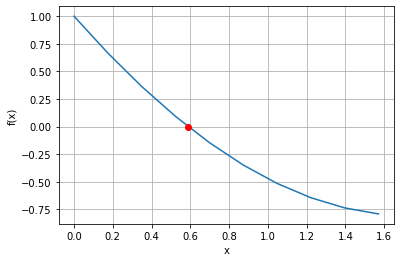

In [29]:
from matplotlib import pyplot as plt
x = np.linspace(0, .5*math.pi, 10)
plt.plot(x, f(x))
plt.plot(x_bisection, f(x_bisection), 'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

\begin{theorem}(Konvergenz des Bisektionsverfahrens)\label{theo:KonvergenzBisektions}

Unter den Voraussetzungen des Nullstellensatzes konvergiert die Folge
der Intervallmitten $(x_k)$ gegen eine Nullstelle $x_*$ von $f$,\
und es gilt die *a priori* Fehlerabschätzung
$$|x_k  - x_*| \leqslant \frac{b-a}{2^{k+1}}, \quad k=0,1,2,\ldots$$ Das
Bisektionsverfahren konvergiert also R-linear.
\end{theorem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

Die Konvergenz muss nicht monoton sein: i.A.
$|x_{k+1}  - x_*| \nleqslant |x_k  - x_*|$.

### Newton-Verfahren

Angenommen, $f:[a,b]\to\mathbb{R}$ ist differenzierbar und die Ableitung
$f'$ lässt sich leicht  berechnen.

Beim Newton-Verfahren ersetzt man die Funktion $f$ durch die Tangente im
Punkt $(x_k, f(x_k))$, um die nächste Näherung $x_{k+1}$ zu bestimmen.\

[<img src="figs/tafel.png" alt="Tafel"
	title="Skizze, Herleitung" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

\begin{problem}(Newton-Verfahren)\label{a:newton}

Wähle $x_0\in[a,b]$ mit $f'(x_0) \neq 0$

Für $k=0,1,2,\ldots$:

$\qquad$ $x_{k+1} := x_k - \dfrac{f(x_k)}{f'(x_k)} =: x_k - \Delta x_k$

solange bis Abbruchkriterium erfüllt, z.B. $|\Delta x_k| < \delta$ oder
$|f(x_k)| < \varepsilon$
\end{problem}


[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung, Beispiel" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

#### Gleiches Testproblem wie oben
$f(x) = e^{-x} - \sin x$

$f'(x) = -e^{-x} - \cos x$

In [30]:
from math_so.utils import newton
def df(x):
    return -np.exp(-x) - np.cos(x)
x0 = 1.
tol = 1e-6
x_newton = newton(f, df, x0, tol)

INFO:root:k =  1, x =  4.78527789e-01, f(x) =  1.59222211e-01, dx =  5.21472211e-01
INFO:root:k =  2, x =  5.84157019e-01, f(x) =  6.07930613e-03, dx = -1.05629230e-01
INFO:root:k =  3, x =  5.88525112e-01, f(x) =  1.05845200e-05, dx = -4.36809280e-03
INFO:root:k =  4, x =  5.88532744e-01, f(x) =  3.23333582e-11, dx = -7.63175116e-06
INFO:root:k =  5, x =  5.88532744e-01, f(x) =  0.00000000e+00, dx = -2.33134476e-11
INFO:root:terminated after 5 iterations
INFO:root:x = 0.5885327439818611, f(x) = 0.0


#### Anwendung: Heron-Verfahren

-   Zur Berechnung von $\sqrt{a}$ suchen wir die Nullstelle der Funktion
    $$f:(0,\infty)\to\mathbb{R}, \quad f(x) = x^2 - a, \qquad f'(x) = 2x$$

-   Das Newton-Verfahren lautet
    $$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} = x_k - \frac{x_k^2 - a}{2x_k} = \frac{1}{2}\left( x_k + \frac{a}{x_k}\right).$$

-   Dieses Verfahren wurde nach Heron von Alexandria (100 n. Chr.)
    benannt, war aber bereits um 1750 v. Chr. in Mesopotamien bekannt.

[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

In [31]:
from math_so.utils import heron
x = heron(4, 1e-6)

INFO:root:k =  1, x =  2.50000000e+00, f(x) =  2.25000000e+00, dx =  1.50000000e+00
INFO:root:k =  2, x =  2.05000000e+00, f(x) =  2.02500000e-01, dx =  4.50000000e-01
INFO:root:k =  3, x =  2.00060976e+00, f(x) =  2.43939619e-03, dx =  4.93902439e-02
INFO:root:k =  4, x =  2.00000009e+00, f(x) =  3.71689188e-07, dx =  6.09663175e-04
INFO:root:k =  5, x =  2.00000000e+00, f(x) =  8.88178420e-15, dx =  9.29222927e-08
INFO:root:terminated after 5 iterations
INFO:root:x = 2.000000000000002, f(x) = 8.881784197001252e-15


In [32]:
x = heron(2, 1e-6)

INFO:root:k =  1, x =  1.50000000e+00, f(x) =  2.50000000e-01, dx =  5.00000000e-01
INFO:root:k =  2, x =  1.41666667e+00, f(x) =  6.94444444e-03, dx =  8.33333333e-02
INFO:root:k =  3, x =  1.41421569e+00, f(x) =  6.00730488e-06, dx =  2.45098039e-03
INFO:root:k =  4, x =  1.41421356e+00, f(x) =  4.51061410e-12, dx =  2.12389982e-06
INFO:root:k =  5, x =  1.41421356e+00, f(x) =  4.44089210e-16, dx =  1.59474291e-12
INFO:root:terminated after 5 iterations
INFO:root:x = 1.4142135623730951, f(x) = 4.440892098500626e-16


\begin{theorem}(Konvergenz des Newton-Verfahrens)\label{theo:newtonkonv}

Sei $f\in C^2([a,b])$ und $x_*\in(a,b)$ mit $f(x_*)=0$ und $f'(x_*)\neq 0$.\
Dann gibt es ein $\delta>0$, so dass das Newton-Verfahren für jeden
Startwert $x_0\in(x_*-\delta, x_*+\delta)$ **quadratisch** gegen
$x_*$ konvergiert, d.h. $p=2$ in Def. \ref{df:konvergenzgeschw}.
\end{theorem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

#### Komplikationen beim Newton-Verfahren

-   Das Verfahren kann scheitern, wenn ein Folgenglied $x_k$ nicht mehr
    im (maximalen) Definitionsbereich von $f$ liegt.

-   $(x_k)$ kann divergieren, obwohl Nullstellen existieren.

-   Die Rekursion kann endlos zwischen zwei Werten hin und her pendeln.

Beispiele siehe Übungen

Falls die Berechnung der Ableitung aufwendig ist, kann man versuchen,
dies nur einmal für den Startwert zu tun:

\begin{problem}(Vereinfachtes Newton-Verfahren)\label{prob:VereinfNewton}

Wähle $x_0\in[a,b]$ mit $f'(x_0) \neq 0$\
Für $k=0,1,2,\ldots$:\
$\qquad$ $x_{k+1} := x_k - \dfrac{f(x_k)}{f'(x_0)} =: x_k - \Delta x_k$\
solange bis Abbruchkriterium erfüllt, z.B. $|\Delta x_k| < \delta$ oder
$|f(x_k)| < \varepsilon$
\end{problem}

Das vereinfachte Newton-Verfahren konvergiert i.A. nur linear.

### Sekantenverfahren, Regula falsi

Beim Sekantenverfahren erhält man die nächste Näherung $x_{k+1}$ als
Nullstelle der Geraden (Sekanten) durch die Punkte $(x_k, f(x_k))$ und
$(x_{k-1}, f(x_{k-1}))$. Es werden zwei Startwerte $x_0, x_1$ benötigt,
die die gesuchte Nullstelle von $f$ nicht unbedingt einschließen
müssen.\

[<img src="figs/tafel.png" alt="Tafel"
	title="Skizze, Herleitung" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

\begin{problem}(Sekantenverfahren)\label{algo:Sekantenverfahren}

Wähle $x_0, x_1 \in[a,b]$\
Für $k=1,2,3,\ldots$:\
$\qquad$
$x_{k+1} := x_k - f(x_k) \dfrac{x_k - x_{k-1}}{f(x_k) - f(x_{k-1})} =: x_k - \Delta x_k$\
solange bis Abbruchkriterium erfüllt, z.B. $|\Delta x_k| < \delta$ oder
$|f(x_k)| < \varepsilon$
\end{problem}

[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung, Beispiel" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

In [33]:
from math_so.utils import secant_method
x0 = .7
x1 = 1.
tol = 1e-6
x_secant = secant_method(f, x0, x1, tol)

INFO:root:k =  1, x =  5.64124957e-01, f(x) =  3.41811448e-02, dx =  4.35875043e-01
INFO:root:k =  2, x =  5.89669615e-01, f(x) = -1.57600625e-03, dx = -2.55446587e-02
INFO:root:k =  3, x =  5.88479107e-01, f(x) =  7.43909968e-05, dx =  1.19050862e-03
INFO:root:k =  4, x =  5.88535273e-01, f(x) = -3.50755786e-06, dx = -5.61663502e-05
INFO:root:k =  5, x =  5.88532625e-01, f(x) =  1.65390993e-07, dx =  2.64832322e-06
INFO:root:k =  6, x =  5.88532750e-01, f(x) = -7.79862086e-09, dx = -1.24875578e-07
INFO:root:terminated after 6 iterations
INFO:root:x = 0.5885327496049312, f(x) = -7.79862086019989e-09


Vorteil des Sekantenverfahrens ggü. dem Newton-Verfahren:\
Die Ableitung von $f$ wird nicht benötigt.\
Nachteil: langsamere Konvergenz

\begin{theorem}

Falls $f'(x_*)\neq 0$ und $f''(x_*)\neq 0$, so ist die Konvergenzordnung
des Sekantenverfahrens
$$p = {\textstyle \frac{1}{2}}(1 + \sqrt{5}) \approx 1.618.$$
\end{theorem}

Das Sekantenverfahren lässt sich mit dem Bisektionsverfahren
kombinieren. So erhält man die **Regula falsi** (Regel des
Falschen, schon $\sim$ 1550 v. Chr. Ägypten, auch Adam Ries(e) $\sim$
1522 bekannt):

\begin{problem}(Regula falsi)\label{algo:Regulafalsi}
Überprüfe $f(a)f(b)<0$, setze $a_0 := a$, $b_0 := b$\
Für $k=0,1,2,\ldots$:\
$\qquad x_k := a_k - f(a_k) \dfrac{b_k - a_k}{f(b_k) - f(a_k)}$\
$\qquad$ Falls $f(a_k) f(x_k) > 0$, setze $a_{k+1} := x_k$,
$b_{k+1} := b_k$,\
$\qquad$ andernfalls $a_{k+1} := a_k$, $b_{k+1} := x_k$\
solange bis Abbruchkriterium erfüllt, z.B. $|f(x_k)| < \varepsilon$ oder
$b_k - a_k < \delta$
\end{problem}


**Beobachtung:** Ersetzt man in der Rekursion $f(a_k) \to -1$ und
$f(b_k)\to 1$, so erhält man $x_k = (a_k + b_k)/2$, das
Bisektionsverfahren.

Skizze der ersten beiden Iterationen:

![image](figs/False_position_method.png)

<https://commons.wikimedia.org/wiki/File:False_position_method.svg>

[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung, Beispiel" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

In [34]:
from math_so.utils import regula_falsi
a = 0
b = .5*math.pi
tol = 1e-6
x_regula_falsi = regula_falsi(f, a, b, tol)

INFO:root:k= 1, a= 0.00000000e+00, b= 8.76501549e-01, x= 6.48171203e-01, f(_x)=-8.07281532e-02
INFO:root:k= 2, a= 0.00000000e+00, b= 6.48171203e-01, x= 5.99754158e-01, f(_x)=-1.54929802e-02
INFO:root:k= 3, a= 0.00000000e+00, b= 5.99754158e-01, x= 5.90603943e-01, f(_x)=-2.87015789e-03
INFO:root:k= 4, a= 0.00000000e+00, b= 5.90603943e-01, x= 5.88913667e-01, f(_x)=-5.28221050e-04
INFO:root:k= 5, a= 0.00000000e+00, b= 5.88913667e-01, x= 5.88602755e-01, f(_x)=-9.70953547e-05
INFO:root:k= 6, a= 0.00000000e+00, b= 5.88602755e-01, x= 5.88545610e-01, f(_x)=-1.78436739e-05
INFO:root:k= 7, a= 0.00000000e+00, b= 5.88545610e-01, x= 5.88535108e-01, f(_x)=-3.27908208e-06
INFO:root:k= 8, a= 0.00000000e+00, b= 5.88535108e-01, x= 5.88533178e-01, f(_x)=-6.02583210e-07
INFO:root:k= 9, a= 0.00000000e+00, b= 5.88533178e-01, x= 5.88532824e-01, f(_x)=-1.10734045e-07
INFO:root:terminated after 9 iterations
INFO:root:x = 0.5885328238248644, f(x) = -1.1073404460049119e-07


### Fixpunktverfahren

**Idee:** Schreibe die nichtlineare Gleichung 

$$f(x) = 0, \quad x\in I$$

als **Fixpunktgleichung** um: $$x = F(x), \quad x\in I$$ 

für eine geeignete Funktion $F$ und iteriere mit Startwert $x_0\in I$:

$$x_{k+1} = F(x_k), \quad k = 0,1,2,\ldots$$ 

Wann konvergiert $(x_k)$?

[<img src="figs/notebook.png" alt="Notebook"
	title="Implementierung, Beispiel" width="50" height="50" />](../Numerik/Python/chapter4.ipynb)

#### Testproblem

$f(x) = e^{-x} - \sin(x) = 0 \; \Leftrightarrow \; x = -\ln\sin x =: F_1(x) \; \Leftrightarrow \; x = \arcsin(e^{-x}) =: F_2(x)$

In [35]:
from math_so.utils import fpiterate
def F1(x):
    return -np.log(np.sin(x))
def F2(x):
    return np.arcsin(np.exp(-x))
x0 = 1.
tol = 1e-6
x_fpiterate1 = fpiterate(F1, x0, tol)

INFO:root:k =  1, x =  1.72603746e-01
INFO:root:k =  2, x =  1.76172708e+00
INFO:root:k =  3, x =  1.83391091e-02
INFO:root:k =  4, x =  3.99877545e+00
INFO:root:k =  5, x =             nan
INFO:root:terminated after 5 iterations
INFO:root:x = nan f(x) = nan


<ipython-input-35-9bf100a1f2f4>:3: RuntimeWarning: invalid value encountered in log
  return -np.log(np.sin(x))


In [36]:
x_fpiterate2 = fpiterate(F2, x0, tol)

INFO:root:k =  1, x =  3.76727508e-01
INFO:root:k =  2, x =  7.56118767e-01
INFO:root:k =  3, x =  4.88707496e-01
INFO:root:k =  4, x =  6.60382183e-01
INFO:root:k =  5, x =  5.42938144e-01
INFO:root:k =  6, x =  6.20004185e-01
INFO:root:k =  7, x =  5.67994089e-01
INFO:root:k =  8, x =  6.02447720e-01
INFO:root:k =  9, x =  5.79337836e-01
INFO:root:k = 10, x =  5.94710804e-01
INFO:root:k = 11, x =  5.84427628e-01
INFO:root:k = 12, x =  5.91280788e-01
INFO:root:k = 13, x =  5.86702245e-01
INFO:root:k = 14, x =  5.89756098e-01
INFO:root:k = 15, x =  5.87716959e-01
INFO:root:k = 16, x =  5.89077547e-01
INFO:root:k = 17, x =  5.88169268e-01
INFO:root:k = 18, x =  5.88775404e-01
INFO:root:k = 19, x =  5.88370813e-01
INFO:root:k = 20, x =  5.88640834e-01
INFO:root:k = 21, x =  5.88460607e-01
INFO:root:k = 22, x =  5.88580893e-01
INFO:root:k = 23, x =  5.88500609e-01
INFO:root:k = 24, x =  5.88554193e-01
INFO:root:k = 25, x =  5.88518429e-01
INFO:root:k = 26, x =  5.88542299e-01
INFO:root:k 

\begin{definition}(Lipschitz-Stetigkeit, Kontraktion)\label{def:Lipschitz}

a)  Eine reelle Funktion $f:I\to\mathbb{R}$ auf einem Intervall $I$
    heißt **Lipschitz-stetig**, falls es eine Konstante $L>0$
    gibt, so dass
    $$|f(x_1) - f(x_2)| \leqslant L \, |x_1 - x_2| \quad \forall x_1, x_2 \in I.$$

b)  Ist $f:I\to {I}$ Lipschitz-stetig mit $L<1$, so heißt $f$ eine
    **Kontraktion**.
\end{definition}

\begin{theorem}(Eigenschaften Lipschitz-stetiger Funktionen)\label{theo:Lipschitz}

a)  Ist $f:I\to\mathbb{R}$ Lipschitz-stetig, so ist $f$ auch stetig.

b)  Ist $f:I\to\mathbb{R}$ differenzierbar und existiert
    $$L := \sup_{x\in I} |f'(x)| < \infty,$$ so ist $f$ auf $I$
    Lipschitz-stetig mit Konstante $L$.
\end{theorem}

Die Umkehrungen dieser Aussagen gelten i.A. nicht!

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis, Beispiele" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

\begin{theorem}(Banach’scher Fixpunktsatz)\label{theo:Fixpunktsatz}

Sei $F:I\to I$ eine Kontraktion mit Lipschitz-Konstante $L<1$. Dann gilt:

a)  Die Folge $(x_k)$ mit $x_{k+1} = F(x_k)$ konvergiert für jeden
    Startwert $x_0\in I$ gegen den eindeutigen Fixpunkt $x_*$ von $F$ in
    $I$.

b)  Es gilt die *a priori* Fehlerabschätzung
    $$|x_k - x_*| \leqslant \frac{L^k}{1-L} |x_1 - x_0|, \quad k=0,1,\ldots$$

c)  Es gilt die *a posteriori* Fehlerabschätzung
    $$|x_k - x_*| \leqslant \frac{L}{1-L} |x_k - x_{k-1}|, \quad k=1,2,\ldots$$
\end{theorem}

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

Als Folgerung und Verallgemeinerung erhalten wir:

\begin{theorem}(Konvergenzkriterien für das Fixpunktverfahren)\label{theo:Konvergenzkriterien}

$F\in C^{p+1}(I, I)$ habe einen Fixpunkt $x_* \in I$.

a)  Das Fixpunktverfahren ist mindestens linear konvergent, falls
    $$|F'(x_*)|  < 1.$$

b)  Das Fixpunktverfahren ist mindestens $p$-ter Ordnung,
    $p\geqslant 2$, falls
    $$F^{(k)}(x_*) = 0 \text{ für } k=1,2,\ldots, p-1.$$

c)  Das Fixpunktverfahren divergiert, falls $$|F'(x_*)|  > 1.$$
\end{theorem}

**Bemerkung**: Für $|F'(x_*)|=1$ ist keine Aussage möglich.

[<img src="figs/tafel.png" alt="Tafel"
	title="Beweis von a) und c)" width="50" height="50" />](../Numerik/AufschriebeNeu/Numerik%204.pdf)

#### Beispiel zur Fixpunktiteration

-   **Logistische Gleichung** als demographisches Modell\
    (z.B. Virusausbreitung, $x$ Zahl der Infizierten)
    $$x_{k+1} = F(x_k), \qquad F(x) := \alpha x (1 - x)$$

-   Fixpunkt:
    $$x_* = F(x_*) \; \Leftrightarrow \; x_* = 1 - \frac{1}{\alpha}$$

-   Ableitung:
    $$F'(x) = \alpha(1 - 2x) \; \Rightarrow \; F'(x_*) = 2 - \alpha$$

-   Konvergenz für
    $$|F'(x_*)| < 1 \; \Leftrightarrow \; 1 < \alpha < 3$$

-   Divergenz für
    $$|F'(x_*)| > 1 \; \Leftrightarrow \; \alpha < 1 \, \vee \, \alpha > 3$$


$0 < F'(x) < 1$: monotone Konvergenz, z.B. für $\alpha = 1.9$

![image](figs/fp1.png)

<https://www5.in.tum.de/lehre/vorlesungen/konkr_math/SS_14/vorl/vorl9_Fixpunktiteration.pdf>

$-1 < F'(x) < 0$: alternierende Konvergenz, z.B. für $\alpha = 2.9$

![image](figs/fp2.png)

<https://www5.in.tum.de/lehre/vorlesungen/konkr_math/SS_14/vorl/vorl9_Fixpunktiteration.pdf>

$|F'(x)| > 1$: Divergenz, z.B. für $\alpha = 4$

![image](figs/fp3.png)

<https://www5.in.tum.de/lehre/vorlesungen/konkr_math/SS_14/vorl/vorl9_Fixpunktiteration.pdf>

### Das Newton-Verfahren als Fixpunktverfahren

Das Newton-Verfahren (Algorithmus \ref{a:newton} zur Bestimmung einer Nullstelle einer differenzierbaren Funktion $f:[a,b]\to\mathbb{R}$ lässt sich als Fixpunktiteration

$$x_{k+1} = F(x_{k})$$ 

schreiben mit 

$$F(x) := x - \frac{f(x)}{f'(x)}.$$

Damit lässt sich Satz \ref{theo:newtonkonv} über die quadratische Konvergenz des
Newton-Verfahrens auch mithilfe von Satz \ref{theo:Konvergenzkriterien} beweisen (Übung).

Interpolation
=============

### Interpolation und Approximation

Eine reelle Funktion $f(x)$ oder eine Datentabelle $(x_i, y_i)$,
$i=0,1,\ldots, n$ soll durch eine einfache Funktion $g(x)$ angenähert
werden.

-   **Approximation:**

    -   $g$ wird so bestimmt, dass eine Funktionsnorm
        $\lVert g(x) - f(x) \rVert$ bzw. Vektornorm
        $\lVert g(x_i) - y_i\rVert$ minimal wird.

    -   Typischerweise sind sehr viele Daten gegeben ($n$ ist sehr
        groß), die mit statistischen bzw. Messfehlern behaftet sind.

    -   Es soll eine möglichst glatte Kurve durch diese Datenwolke 
        gelegt werden. Beispiel: lineare Regression\
        ![image](figs/linear_regression.png){height="0.4\\textheight"}\
        <https://commons.wikimedia.org/wiki/File:Linear_regression.svg>

### Interpolation und Approximation

-   **Interpolation:**

    -   $g$ wird so konstruiert, dass sie an vorgegebenen Stellen mit
        der gegebenen Funktion bzw. den Daten übereinstimmt:
        $$g(x_i) = f(x_i) \quad \text{bzw.} \quad g(x_i) = y_i, \quad i=0,1,\ldots, n.$$

    -   Es sind nur wenige Daten gegeben ($n$ ist klein), und es ist
        sinnvoll/wichtig, dass $g$ an den gegebenen Stellen $x_i$ exakt
        mit den Funktionswerten $f(x_i)$ bzw. den Daten $y_i$
        übereinstimmt.\
        ![image](figs/interpolation.png){height="0.4\\textheight"}\
        <https://commons.wikimedia.org/wiki/File:Interpolation_example_polynomial.svg>

### Interpolation und Approximation

-   In diesem Kapitel beschäftigen wir uns nur mit der Interpolation.

-   Als Interpolationsfunktionen $g$ kommen z.B. Polynome oder
    trigonometrische Funktionen infrage.

-   Wir betrachten hier nur die **Polynominterpolation**:

    -   Interpolation von $f:[a,b]\to\mathbb{R}$ durch ein einziges
        Polynom auf $[a,b]$

    -   Stückweise Interpolation auf Teilintervallen (Polynomzug,
        **Spline**)

Polynominterpolation
--------------------

Gegeben seien $n+1$ reelle Wertepaare $(x_i, y_i)$, $i=0,1,\ldots, n$,\
mit paarweise verschiedenen Stützstellen $x_i$.\
Dann gibt es genau ein Polynom $P_n(x)$ mit
$\mathsf{Grad}P_n \leqslant n$, das die Interpolationsbedingung
$$P_n(x_i) = y_i, \quad i=0,1,\ldots, n$$ erfüllt, nämlich
$$P_n(x) = \sum_{i=0}^n y_i L_i(x)$$ mit den
**Lagrange-Polynomen**
$$L_i(x) := \prod_{\substack{j=0\\j\neq i}}^n \frac{x-x_j}{x_i-x_j}.$$
Es gilt $\mathsf{Grad}L_i = n$ und $L_i(x_k) = \delta_{ik}$.

![image](figs/tafel.png){width="0.5cm"}Beweis

### Newton-Interpolation

-   Die Berechnung der Lagrange-Polynome $L_i$ ist recht aufwendig.

-   Wenn eine Stützstelle hinzukommt, müssen *alle* $L_i$ neu berechnet
    werden!

-   Geschickter wäre folgende Darstellung des Interpolationspolynoms:
    $$\begin{aligned}
        P_n(x) = &&c_0 + c_1(x-x_0) + c_2(x-x_0)(x-x_1) + \ldots \\
        && + c_n(x-x_0)(x-x_1) \cdots (x-x_{n-1}). 
      \end{aligned}$$ mit noch zu bestimmenden Koeffizienten $c_i$.

-   Kommt eine Stützstelle $x_{n+1}$ hinzu, muss für $P_{n+1}(x)$ nur
    der letzte Koeffizient $c_{n+1}$ neu berechnet werden, alle anderen
    bleiben gleich.

### Horner-Schema

Funktionswerte des Interpolationspolynoms können dann mit dem
**Horner-Schema** berechnet werden: $$\begin{aligned}
    P_n(x) &=&c_0 + c_1(x-x_0) + c_2(x-x_0)(x-x_1) + \ldots \\
    &&+ c_n(x-x_0)(x-x_1) \cdots (x-x_{n-1})\\
    &=& c_0 + (x-x_0)\{ c_1 + (x-x_1) [c_2 + (x-x_2)( \\
    &&\ldots c_{n-1} + (x-x_{n-1}) c_n)]\}
  \end{aligned}$$

$p := c_n$\
Für $k=n-1,n-2,\ldots,0$:\
$p := c_k + (x-x_k) p$\
Für den so berechneten Wert gilt $p = P_n(x)$.

![image](figs/notebook.png){width="0.5cm"}Implementierung, Beispiel

Wie können wir die Koeffizienten $c_k$ aus den Wertepaaren $(x_k, y_k)$
berechnen?

Es bezeichne $P^*_{k,k+1,\ldots,k+j}(x)$ das Interpolationspolynom
$j$-ten Grades zu den Wertepaaren $(x_{k+i}, y_{k+i})$,
$i=0,1,\ldots, j$.\
Dann gilt für $1\leqslant j \leqslant n$ die Rekursionsformel
$$P^*_{k,\ldots,k+j}(x) = \frac{(x-x_k) P^*_{k+1,\ldots,k+j}(x) - (x - x_{k+j}) P^*_{k,\ldots,k+j-1}(x)}{x_{k+j} - x_k}.$$

![image](figs/tafel.png){width="0.5cm"}Beweis

Wir definieren $[y_k] := y_k$ für $k=0,1,\ldots, n$, und rekursiv
$$[y_k, y_{k+1}, \ldots, y_{k+j}] := \frac{[y_{k+1}, \ldots, y_{k+j}] - [y_{k}, \ldots, y_{k+j-1}]}{x_{k+j} - x_k}$$
für $j=2,3,\ldots, n, \; k=0,1, \ldots, n-j$.

Der führende Koeffizient von $P^*_{k,k+1,\ldots,k+j}(x)$ ist
$[y_k, y_{k+1}, \ldots, y_{k+j}]$.\
Damit folgt insbesondere
$$c_j = [y_0, y_1, \ldots, y_j], \quad j = 0,1,\ldots,n.$$

![image](figs/tafel.png){width="0.5cm"}Beweis, Newton-Schema

Für $k=0,1,\ldots,n$:\
$c_k := y_k$\
Für $k=1,2,\ldots,n$:\
Für $i=n,n-1,\ldots,k$:\
$c_i := \dfrac{c_i - c_{i-1}}{x_i - x_{i-k}}$

![image](figs/notebook.png){width="0.5cm"}Implementierung, Beispiel

[\[satz:div_diff_aequi\]]{#satz:div_diff_aequi
label="satz:div_diff_aequi"} Sind die Stützstellen
**äquidistant**, d.h. $x_{k+1} - x_k = h$ für $k=0,1,\ldots, n-1$,
so gilt
$$c_j = [y_0,y_1,\ldots,y_j] = \frac{1}{j! h^j} \sum_{k=0}^j {j\choose k} (-1)^{j+k} y_k.$$

Beweis: Übung

[\[satz:polyinterpfehler\]]{#satz:polyinterpfehler
label="satz:polyinterpfehler"} Gegeben seien eine Funktion
$f \in C^{n+1}[a,b]$ und die $n+1$ Stützstellen $x_i\in[a,b]$,
$i=0,1,\ldots, n$. Sei $P_n$ das die Punkte $(x_i, f(x_i))$
interpolierende Polynom vom Höchstgrad $n$ und
$$\omega(x) := (x-x_0)(x-x_1) \cdots (x-x_n).$$ Dann gibt es zu jedem
$\tilde x\in[a,b]$ ein $\xi\in(a,b)$ mit
$$f(\tilde x) - P_n(\tilde x) = \frac{\omega(\tilde x)f^{(n+1)}(\xi)}{(n+1)!}.$$
Damit gilt also
$$|f(\tilde x) - P_n(\tilde x)| \leqslant \frac{|\omega(\tilde x)|}{(n+1)!}
      \max_{\xi\in[a,b]} |f^{(n+1)}(\xi)|.$$

![image](figs/tafel.png){width="0.5cm"}Beweis
![image](figs/notebook.png){width="0.5cm"}Illustration, Beispiel

### Hermite-Interpolation

Zusätzlich zu den Stützwerten sollen an den Stützstellen jetzt noch
Ableitungswerte vorgegeben werden:\
Gesucht ist ein Polynom $P_{2n+1}$ vom Höchstgrad $2n+1$mit
$$P_{2n+1}(x_i) = y_i, \quad P'_{2n+1}(x_i) = y_i', \quad i = 0,1,\ldots, n.$$
Dazu werden alle Stützstellen doppelt gezählt:
$x_0, x_0, x_1, x_1, \ldots, x_n, x_n$. Das Interpolationspolynom hat
jetzt die Form $$\begin{aligned}
 P_{2n+1}(x) &=& c_0 + c_1(x-x_0) + c_2 (x-x_0)^2 + c_3(x - x_0)^2 (x-x_1) \\ &&+ x_4(x-x_0)^2(x-x_1)^2 + \ldots \\ 
    &&+ c_{2n+1}(x-x_0)^2(x-x_1)^2 \cdots (x-x_{n-1})^2(x-x_n) . 
  \end{aligned}$$ Die Koeffizienten $c_k$ können wieder mit dem
Newton-Schema bestimmt werden, wobei die dividierten Differenzen
gleicher Stützstellen durch die Ableitung ersetzt werden:
$$[y_k,y_k] = \lim_{h\to 0} \frac{f(x_k+h) - f(x_k)}{(x_k + h) - x_k} = f'(x_k) = y_k'.$$
![image](figs/tafel.png){width="0.5cm"}Schema
![image](figs/notebook.png){width="0.5cm"}Beispiel

Spline-Interpolation
--------------------

### Stückweise Interpolation

-   Interpolation von $f:[a,b]\to\mathbb{R}$ an den Stützstellen
    $a = x_0 < x_1 < \ldots < x_{n-1} < x_n = b$ durch ein einziges
    Polynom führt oft zu großen Oszillationen besonders am Rand des
    Intervalls.

-   Alternative: Unterschiedliche Polynome niedrigen Grades in jedem
    Teilintervall

-   Einfachster Fall: Stückweise lineare Interpolation\
    ![image](figs/pw_lin_interp.png)
    $$l(x) = f(x_k) + \frac{f(x_{k+1}) - f(x_k)}{x_{k+1} - x_k}(x-x_k), \; 
        x\in [x_k , x_{k+1}], \; k=0,\ldots,n-1$$ $l(x)$ ist jedoch
    nicht differenzierbar.

<https://de.wikipedia.org/wiki/Datei:Linear_interpolation.svg>

### Stückweise Interpolation

0.6

-   Besser: Stückweise kubische Interpolation $\rightarrow$ kubische
    **Splines**

-   Engl. spline = Straklatte, elastische Latte aus Holz oder
    Kunststoff, z.B. im Schiffbau verwendet

-   Die Straklatte nimmt die Kurve $s(x)$ kleinster Krümmung an

-   Die Krümmungsenergie ist durch die zweite Ableitung gegeben:
    $$\int_a^b s''(x)^2 \, \mathsf{d}x$$

0.5 ![image](figs/spline_interp.png)\
![image](figs/straklatte.png){height="0.5\\textheight"}

<https://commons.wikimedia.org/wiki/File:Spline_interpolation.svg>\
<https://commons.wikimedia.org/wiki/File:Spline_(PSF).png>

Es existiert genau eine Funktion $s:[a,b]\to\mathbb{R}$ mit den
folgenden Eigenschaften:

(i) $s(x_i) = y_i$, $i=0,1,\ldots n$

(ii) $s$ ist mindestens einmal stetig differenzierbar.

(iii) Im Innern jedes Teilintervalls $(x_i, x_{i+1})$,
      $i=0,1,\ldots, n-1$,\
      ist $s$ mindestens viermal stetig differenzierbar.

(iv) $s$ minimiert das Funktional
     $$J[s] := {\textstyle \frac{1}{2}}\int_a^b s''(x)^2 \, \mathsf{d}x.$$

![image](figs/tafel.png){width="0.5cm"}Beweis

**Zusammenfassung** des Ergebnisses des konstruktiven Beweises:\
$s(x) = s_i(x)$ für $x\in[x_i,x_{i+1}]$ für $i=0,1,\ldots,n-1$, wobei
$$s_i(x) = \frac{1}{6} \left( c_i \frac{(x_{i+1} - x)^3}{h_i} 
    + c_{i+1} \frac{(x - x_i)^3}{h_i} \right) + b_i(x-x_i) + a_i$$ mit
$h_i := x_{i+1} - x_i$.\
Zuerst löst man folgendes lineares Gleichungssystem für die $c_i$:
$$\frac{h_{i-1}}{6} c_{i-1} + \frac{h_{i-1} + h_i}{3} c_i + \frac{h_i}{6} c_{i+1}
  = \frac{y_{i+1} - y_i}{h_i} - \frac{y_i - y_{i-1}}{h_{i-1}}$$ für
$i=1,\ldots,n-1$ sowie $c_0 = c_n = 0$.\
Dann setzt man $$a_i = y_i - \frac{h_i^2}{6} c_i, \qquad 
     b_i = \frac{y_{i+1} - y_i}{h_i} - \frac{h_i}{6} (c_{i+1} - c_i).$$\
![image](figs/notebook.png){width="0.5cm"}Implementierung

**Bemerkungen**

-   Das LGS hat die Form
    $$\gamma_i c_{i-1} + \alpha_i c_i + \beta_i c_{i+1} = \delta_i.$$
    Solch ein tridiagonales LGS lässt sich schnell mithilfe des
    Thomas-Algorithmus lösen (Kapitel 3)!

-   Anstelle der **natürlichen Randbedingungen**
    $$s''(x_0) = s''(x_n) = 0 \; \Leftrightarrow \; c_0 = c_n = 0$$ sind
    auch möglich:

    -   **Hermite-** (oder **vollständige**)
        **Randbedingungen**
        $$s'(x_0) = y_0', \quad s'(x_n) = y_n',$$ wobei man $y_0', y_n'$
        z.B. aus zu interpolierenden Funktion erhält

    -   **periodische Randbedingungen**
        $$s'(x_0) = s'(x_n), \quad s''(x_0) = s''(x_n)$$

Numerische Differentiation {#chap:numdiff}
==========================

**Ziel:** Näherungsweise Bestimmung der Ableitung(en) einer Funktion
$f:[a,b]\to\mathbb{R}$\
**Idee:** Nähere $f$ durch Interpolationspolynom $P_n$ und leite $P_n$
ab\

Gegeben seien $f\in C^n[a,b]$ und Stützstellen
$$a = x_0 < x_1 < \ldots < x_{n-1} < x_n = n.$$ Es sei $y_i := f(x_i)$,
$i=0,1,\ldots, n$. Dann existiert ein $\xi\in[a,b]$, so dass
$$f^{(n)}(\xi) = n! \, [y_0, y_1, \ldots, y_n].$$

![image](figs/tafel.png){width="0.5cm"}Beweis\
Die genäherten Ableitungen können also über das Newton-Schema erzeugt
werden. Für äquidistante Stützstellen gilt die explizite Formel aus Satz
[\[satz:div_diff_aequi\]](#satz:div_diff_aequi){reference-type="ref"
reference="satz:div_diff_aequi"}.

Üblicherweise wird mit diesen Ausdrücken $f^{(n)}(x_0)$ approximiert.\
Man spricht dann auch von **Vorwärts-Differenzenquotienten/\
finiten Differenzen**.\
Bei äquistanten Stützstellen mit Schrittweite $h$ erhält man
$$\begin{aligned}
    f'(x_0) &\approx& \frac{y_1 - y_0}{h} \\
    f''(x_0) &\approx& \frac{y_2 - 2y_1 + y_0}{h^2} \\
    f'''(x_0) &\approx& \frac{y_3 - 3y_2 + 3 y_1 - y_0}{h^3} \\
    &\vdots
  \end{aligned}$$ Vgl. die Lösung zu Aufgabe 7.2.

Sei $f\in C^{n+1}([a,b])$ und seien $a=x_0, x_1, \ldots, x_n=b$
äquidistante Stützstellen mit Schrittweite $h$. Setze $y_i := f(x_i)$,
$i=0,1,\ldots, n$.\
Dann gilt
$$f^{(n)}(x_0) = n! \, [y_0, y_1, \ldots, y_n] + \mathcal{O}(h).$$

![image](figs/tafel.png){width="0.5cm"}Beweis

Approximationen höherer Fehlerordnung erhält man durch
Interpolationspolynome höherer Ordnung, z.B. interpoliere $f$ an drei
äquidistanten Stützstellen $y_0,y_1,y_2$ und setze
$f'(x_1) \approx P_3'(x_1)$.

Sei $f:[a,b]\to\mathbb{R}$ und seien $x_i\in[a,b]$ äquidistante
Stützstellen mit Schrittweite $h$, $y_i := f(x_i)$. Dann gilt:
$$\begin{aligned}
      f\in C^3([a,b]) &\Rightarrow& f'(x_i) = \frac{y_{i+1} - y_{i-1}}{2h} + \mathcal{O}(h^{{2}}),\medskip\\
      f\in C^4([a,b]) &\Rightarrow& f''(x_i) = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + \mathcal{O}(h^{{2}}).
    \end{aligned}$$

![image](figs/tafel.png){width="0.5cm"}Beweis\
Finite Differenzen für höhere Ableitungen erhält man daraus rekursiv:
$f^{(n)}(x_i) = y_i^{(n)} + \mathcal{O}(h^2)$ mit
$y_i^{(0)} := y_i = f(x_i)$ und $$y_i^{(n)} = \begin{cases} 
    \frac{y_{i+1}^{(n-1)} - y_{i-1}^{(n-1)}}{2h} & \text{falls } n \text{ ungerade}\smallskip\\
    \frac{y_{i+1}^{(n-2)} - 2 y_i^{(n-2)} + y_{i-1}^{(n-2)}}{h^2} & \text{falls } n \text{ gerade}
  \end{cases}$$

### Rundungsfehler

Wegen der Division der Differenzen im Zähler durch Potenzen von $h$
(klein!) sind Rundungsfehler bei finiten Differenzen besonders
gefährlich. Wird $h$ sehr klein, so wird der **Rundungsfehler**
größer als der **Diskretisierungsfehler**.\
![image](figs/notebook.png){width="0.5cm"}Beispiel\

Nach Satz
[\[satz:Rundungsfehler\]](#satz:Rundungsfehler){reference-type="ref"
reference="satz:Rundungsfehler"} ist der relative Fehler bei der Rundung
von der Größenordnung der Maschinengenauigkeit $\mathsf{eps}$, und somit
$$\begin{aligned}
    \frac{\mathsf{rd}(f(x+h) - f(x))}{h} &=& \frac{f(x+h) - f(x)}{h} + \mathcal{O}\left(\frac{\mathsf{eps}\, f(x)}{h}\right) \\
    &=& f'(x) + \mathcal{O}(h \, f''(x)) + \mathcal{O}\left(\frac{\mathsf{eps}\, f(x)}{h}\right)
  \end{aligned}$$ Der Rundungsfehler ist kleiner als der
Diskretisierungsfehler, falls
$$h \, f''(x) \gtrsim \frac{\mathsf{eps}\, f(x)}{h} \Leftrightarrow {h \gtrsim \sqrt{\mathsf{eps}\, \frac{f(x)}{f''(x)}}}.$$

Numerische Integration
======================

Newton-Cotes-Formeln
--------------------

### Newton-Cotes-Formeln

-   **Ziel:** Näherungsweise Bestimmung von
    $I := \int_a^b f(x) \mathsf{d}x$

-   **Idee:** Ersetze $f$ durch Interpolationspolynom $P_m$ an $m+1$
    Stützstellen und integriere dieses exakt:
    $I \approx \tilde I_m := \int_a^b P_m(x) \mathsf{d}x$

-   Lagrange-Darstellung: $P_m(x) = \sum_{i=0}^m f(x_i) L_i(x)$
    $$\Rightarrow \tilde I_m = (b-a) \sum_{i=0}^m w_i f(x_i), \quad
        w_i = \frac{1}{b-a} \int_a^b L_i(x) \mathsf{d}x$$

-   Für äquidistante Stützstellen $x_i = a + ih$ mit $h=(b-a)/m$ :
    $$w_i = \frac{1}{b-a} \int_a^b \prod_{\substack{j=0\\j\neq i}} \frac{x-x_j}{x_i-x_j}\mathsf{d}x = \frac{1}{m} \int_0^m \prod_{\substack{j=0\\j\neq i}} \frac{s-j}{i-j} \mathsf{d}s$$
    (Substitution $s=(x-a)/h$)

![image](figs/tafel.png){width="0.5cm"}Beispiel: Trapezregel,
Simpson-Regel

### Newton-Cotes-Formeln

0.77 Die Simpson-Regel wird auch Kepler'sche Fassregel genannt (nach
Johannes Kepler, 1571-1630)\
<http://www.keplerraum.at/fass.html>

0.23 ![image](figs/kepler_fass.jpg){width="\\textwidth"}

Eine Quadraturformel besitzt den **Genauigkeitsgrad**
$m\in\mathbb{N}$, wenn sie alle Polynome vom Höchstgrad $m$ exakt
integriert und $m$ die größte Zahl mit dieser Eigenschaft ist.

Ist $f$ ein Polynom vom Höchstgrad $m$, so ist das Interpolationspolynom
$P_m$ mit $f$ identisch, und die zugehörige Quadraturformel ist exakt:

Zu $m+1$ paarweise verschiedenen Stützstellen gibt es genau eine
Newton-Cotes-Formel, deren Genauigkeitsgrad mindestens $m$ ist.

### Quadraturfehler

Nach Satz
[\[satz:polyinterpfehler\]](#satz:polyinterpfehler){reference-type="ref"
reference="satz:polyinterpfehler"} gilt für den Fehler der
Polynominterpolation:
$$f(x) - P_m(x) = \frac{\omega(x)f^{(m+1)}(\xi)}{(m+1)!}  \quad
  \text{mit} \quad \omega(x) = \prod_{i=0}^m (x-x_i), \quad \xi\in(a,b).$$
Damit folgt für den Quadraturfehler $E_m[f]:= \tilde I_m - I$ der
Newton-Cotes-Formel $m$-ten Grades:
$$E_m[f] = \frac{1}{(m+1)!} \int_a^b f^{(m+1)}(\xi(x)) \omega(x) \mathsf{d}x.$$
![image](figs/tafel.png){width="0.5cm"}Beispiel: Trapezregel

### Übersicht: (Globale) Newton-Cotes-Formeln

$\,$\

  $m$   $(w_k)_{k=0,1,\ldots m}$          $|E_m[f]| \leqslant$                                                                               Name
  ----- --------------------------------- -------------------------------------------------------------------------------------------------- -----------------------------
                                                                                                                                             
  $1$   ${\textstyle \frac{1}{2}}(1,1)$   $\tfrac{1}{12} (b-a)^3 \max_{\xi\in**a,b]} |f''(\xi)|$                                              [Trapezregel**
  $2$   $\tfrac{1}{6} (1,4,1)$            $\tfrac{1}{90} \left(\frac{b-a}{2}\right)^{{5}} \max_{\xi\in**a,b]} |f^{{(4)}}(\xi)|$   [Simpson-Regel**
  $3$   $\tfrac{1}{8} (1,3,3,1)$          $\tfrac{3}{80} \left(\frac{b-a}{4}\right)^5 \max_{\xi\in[a,b]} |f^{(4)}(\xi)|$                     Newton-$\tfrac{3}{8}$-Regel
  $4$   $\tfrac{1}{90} (7,32,12,32,7)$    $\tfrac{8}{945} \left(\frac{b-a}{5}\right)^7 \max_{\xi\in[a,b]} |f^{(6)}(\xi)|$                    Milne-Regel

\
Ab $m=8$ treten negative Gewichte $w_i$ auf und die Newton-Cotes-
Formeln werden numerisch instabil.\
Der Vollständigkeit halber noch die **Mittelpunktsregel** (eine
**offene** Newton-Cotes-Formel, da $a,b$ keine Stützstellen sind):
$$\int_a^b f(x) \mathsf{d}x \approx (b-a) \, f\left(\frac{a+b}{2}\right), \qquad |E[f]| \leqslant  \frac{1}{24} (b-a)^3 \max_{\xi\in[a,b]}|f''(\xi)|$$

Summierte Newton-Cotes-Formeln
------------------------------

### Summierte Newton-Cotes-Formeln

Zur Erhöhung der Genauigkeit wird das Intervall $[a,b]$ in $n$ gleiche
Teile zerlegt:
$$x_j = a + j h, \quad j=0,1,\ldots,n, \quad h = \frac{b-a}{n}.$$ Die
Newton-Cotes-Formeln werden an diesen Stützstellen mehrfach
aneinandergesetzt. So erhält man

-   die summierte Trapezregel
    $$I\approx T(h) := \frac{h}{2} [f(x_0) + 2f(x_1) + \ldots + 2f(x_{n-1}) + f(x_n)]$$

-   für gerades $n$ die summierte Simpson-Regel
    $$I\approx S(h) := \frac{h}{3} [f(x_0) + 4f(x_1) + 2 f(x_2) + \ldots + 2f(x_{n-2}) + 4 f(x_{n-1})+ f(x_n)]$$

![image](figs/tafel.png){width="0.5cm"}Herleitung, Skizze

$f:[a,b]\to\mathbb{R}$ sei zweimal bzw. viermal stetig differenzierbar.\
Dann gilt für eine äquidistante Zerlegung von $[a,b]$ mit Schrittweite
$h$: $$\begin{aligned}
    |T(h) - I| &\leqslant& \frac{b-a}{12} {h^2} \max_{\xi\in[a,b]} |f''(\xi)|,\\
    |S(h) - I| &\leqslant& \frac{b-a}{180} {h^4} \max_{\xi\in[a,b]} |f^{(4)}(\xi)|.
  \end{aligned}$$

![image](figs/tafel.png){width="0.5cm"}Beweis\
![image](figs/notebook.png){width="0.5cm"}Implementierung

Romberg-Verfahren
-----------------

### Romberg-Verfahren

**Idee:** Berechne die summierte Trapezregel $T(h)$ für eine Folge
kleiner werdender Schrittweiten $h$ und extrapoliere nach $h=0$.

Der Fehler der Trapezregel lässt sich wie folgt entwickeln:
$$T(h) - I = c_1 h^2 + c_2 h^4 + \ldots + c_N h^{2N} + \mathcal{O}(h^{2N+2}).$$
(Explizit gilt für $f\in C^\infty([a,b])$ die
Euler-MacLaurin-Summenformel
$$T(h) - I = \sum_{k=1}^\infty \frac{B_{2k}}{(2k)!} h^{2k}
      \left[ f^{(2k-1)}(b) - f^{(2k-1)}(a) \right],$$ wobei $B_k$ die
Bernoulli-Zahlen sind.)

Für die Folge von Schrittweiten $h_k := (b-a)/2^k$, $k=0, 1,
    \ldots, m$, setze man $T_{k,0} := T(h_k)$ und berechne rekursiv
(Aitken-Neville-Schema)
$$T_{k,j} = \frac{4^j T_{k,j-1} - T_{k-1,j-1}}{4^j - 1}, \quad
    k=1, 2, \ldots, m, \quad j = 1, 2, \ldots, k.$$ Dann ist $T_{m,m}$
in der Regel die genaueste Approximation des Integrals. Für
$f\in C^\infty([a,b])$ gilt $\lim_{m\to\infty} T_{m,m} =
    \int_a^b f(x) \mathsf{d}x$.

![image](figs/tafel.png){width="0.5cm"}Schema, Herleitung\
![image](figs/notebook.png){width="0.5cm"}Implementierung

**Bemerkungen:**

-   In der ersten Spalte der Dreiecksmatrix $T_{k,j}$ stehen die Werte
    der Trapezregel zu den Schrittweiten $h_k$, in der zweiten die
    Simpson-Regel, die dritte heißt Boole-Regel, usw.

-   Bei der Berechnung der Trapezregeln kann man Funktionswerte
    "recyclen": Für $k=2,3,\ldots$ gilt
    $$T_{k,0} = {\textstyle \frac{1}{2}}T_{k-1,0} + h_k [f(a+h_k) + f (a + 3 h_k) +
          \ldots + f(b - 3 h_k) + f (b - h_k)] \vspace{-0.3cm}$$
    ![image](figs/tafel.png){width="0.5cm"}Skizze

### Ausblick: Adaptive Integration

Moderne Algorithmen verwenden adaptive Verfahren. Die Grundidee:

Das Integrationsintervall wird zunächst in $n$ gleiche Teile geteilt.
Auf jedem Teilintervall wird das Integral auf zwei Arten approximiert,
z.B.

-   $I_1$: Trapezregel

-   $I_2$: Simpson-Regel

Dann ist $|I_1 - I_2|$ ein Maß für den numerischen Fehler in diesem
Teilintervall. Das Teilintervall wird nun solange halbiert, bis
$|I_1 - I_2|$ kleiner als eine vorgegebene Toleranz ist.

Lineare Gleichungssysteme: Iterative Verfahren
==============================================

### Motivation

-   Typische Anwendung: Diskretisierung partieller
    Differentialgleichungen mit Differenzenmethoden (Kapitel
    [6](#chap:numdiff){reference-type="ref" reference="chap:numdiff"})\
    ![image](figs/tafel.png){width="0.5cm"}Beispiel

-   Man erhält ein lineares Geichungssystem
    $$\sum_{j=1}^n a_{ij} x_j = b_i, \quad i = 1,2,\ldots n$$ mit einer
    **großen dünnbesetzten Matrix** $A = (a_{ij})$

-   Diese haben in $d>1$ Dimensionen keine zusammenhängende Bandstruktur
    mehr, und es existiert kein schnelles direktes Verfahren wie der
    Thomas-Algorithmus für Bandmatrizen (Algorithmus
    [\[algo:thomas\]](#algo:thomas){reference-type="ref"
    reference="algo:thomas"})

-   Stattdessen kann man **iterative Verfahren** verwenden, die
    eine Folge von immer besseren Approximationen der Lösung erzeugen

-   Jeder Iterationsschritt nutzt die Dünnbesetztheit der Matrix optimal
    aus

Relaxationsverfahren
--------------------

Wir nehmen an, dass $a_{ii}\neq 0$, $i=1,2,\ldots, n$ und lösen die
$i$-te Gleichung nach $x_i$:

$$x_i^{(k+1)} = -\frac{1}{a_{ii}} \left( \sum_{\substack{j=1\\j\neq i}}^n a_{ij} x_j^{(k)} - b_i \right), \quad i=1,2,\ldots, n, \quad k=0, 1, \ldots$$

Schreibt man $A = D - L - U$ mit einer Diagonalmatrix $D$, strikten
unteren Dreiecksmatrix $L$ und strikten oberen Dreiecksmatrix $U$,\
so lautet die Iterationsvorschrift
$$x^{(k+1)} = D^{-1} (L + U) x^{(k)} + D^{-1} b = T_\mathsf{J} x^{(k)} + c_\mathsf{J}$$
mit der **Iterationsmatrix** $T_\mathsf{J} := D^{-1} (L+U)$ und
$c_\mathsf{J} := D^{-1} b$.

Alternativ kann man diejenigen neuen Komponenten $x_j^{(k+1)}$, die
bereits berechnet wurden, sofort nutzen:

$$\begin{aligned}
 x_i^{(k+1)} = -\frac{1}{a_{ii}} \left( \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} + \sum_{j=i+1}^n a_{ij} x_j^{(k)} - b_i \right), \\
        i=1,2,\ldots, n, \quad k=0, 1, \ldots \end{aligned}$$

![image](figs/tafel.png){width="0.5cm"}Erläuterung\
**Bemerkung:** Der Algorithmus hängt entscheidend von der Sortierung der
Unbekannten ab.\
Diesmal lautet die Iterationsvorschrift also $$\begin{aligned}
 &&x^{(k+1)} = D^{-1} (L x^{(k+1)} + U x^{(k)} + b) \\
           &\Leftrightarrow& x^{(k+1)} = (D - L)^{-1} U x^{(k)} + (D - L)^{-1} b
           = T_\mathsf{GS} x^{(k)} + c_\mathsf{GS}
        \end{aligned}$$ mit $T_\mathsf{GS} := (D - L)^{-1} U$ und
$c_\mathsf{GS} := (D - L)^{-1} b$.

Für beide Verfahren kann man einen **Relaxationsparameter**
$\omega$ einführen. Ist $\Delta x^{(k+1)} := x^{(k+1)} - x^{(k)}$ in der
ursprünglichen Iterationsvorschrift, so lautet die modifizierte
Iterationsvorschrift
$$x^{(k+1)} = x^{(k)} + \omega \, \Delta x^{(k+1)}.$$ (Für $\omega = 1$
erhält man offensichtlich das ursprüngliche Verfahren.)\
Das Jacobi-Verfahren wird damit zu

$$\begin{aligned}
        x_i^{(k+1)} = (1 -\omega) x_i^{(k)} -\frac{\omega}{a_{ii}} \left( \sum_{\substack{j=1\\j\neq i}}^n a_{ij} x_j^{(k)} - b_i \right), \\
        i=1,2,\ldots, n, \quad k=0, 1, \ldots 
        \end{aligned}$$

mit der Relaxationsmatrix
$T_\mathsf{JOR}(\omega) = (1-\omega) \mathbb{I} + \omega D^{-1} (L+U)$\
und $c_\mathsf{JOR}(\omega) = \omega D^{-1} b$.

Analog erhält man für das Gauss-Seidel-Verfahren

$$\begin{aligned}
        x_i^{(k+1)} = (1 -\omega) x_i^{(k)} -\frac{\omega}{a_{ii}} \left( \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} + \sum_{j=i+1}^n a_{ij} x_j^{(k)} - b_i \right), \\
        i=1,2,\ldots, n, \quad k=0, 1, \ldots 
        \end{aligned}$$

mit der Relaxationsmatrix
$T_\mathsf{SOR}(\omega) = (D-\omega L)^{-1} [(1-\omega)D + \omega U]$\
und $c_\mathsf{JOR} = \omega (D-\omega L)^{-1} b$.\
![image](figs/notebook.png){width="0.5cm"}Implementierung der Verfahren,
Beispiel

Konvergenzbetrachtungen
-----------------------

Wir haben das LGS also auf verschiedene Arten als Fixpunktgleichung
geschrieben: $$Ax= b \; \Leftrightarrow \; x = Tx + c.$$ Die
Relaxationsverfahren sind die zugehörigen Fixpunktiterationen.

Die Fixpunktiteration $$x^{(k+1)} = T x^{(k)} + c, \quad k=0,1,\ldots$$
konvergiert genau dann für beliebigen Startvektor $x^{(0)}$ gegen die
Lösung $x$, falls der Spektralradius $\sigma(T) < 1$.

Hierbei ist der **Spektralradius**
$\sigma(T) = \max_i |\lambda_i|$ der betragsmäßig größte der (i.A.
komplexen) Eigenwerte $\lambda_i$ von $T$.\
![image](figs/tafel.png){width="0.5cm"}Beweis

Wie beim Banach'schen Fixpunktsatz (Satz
[\[satz:banach\]](#satz:banach){reference-type="ref"
reference="satz:banach"}) gilt eine Abschätzung für die Fehler
$e^{(k)} := x^{(k)} - x$:
$$\lVert {e^{(k+1)}} \rVert_2 \leqslant \sigma(T) \, \lVert {e^{(k)}} \rVert_2.$$
$\sigma(T)$ bestimmt also die **Konvergenzgeschwindigkeit**.\
Für manche LGS, z.B. Diskretisierungen einfacher partieller
Differentialgleichungen, kann man den Spektralradius der
Iterationsmatrizen explizit berechnen.

Die folgenden Sätze machen Aussagen für allgemeine Matrizen $A$.\
Wir benötigen folgende Voraussetzung:

Eine Matrix $A\in\mathbb{R}^{n\times n}$ heißt **irreduzibel**
oder **unzerlegbar**, falls für je zwei beliebige nichtleere und
disjunkte Teilmengen $I$ und $J$ von $M := \{1,2,\ldots, n\}$ mit
$I\cup J = M$ stets Indizes $i\in I$ und $j\in J$ existieren, so dass
$a_{ij}\neq 0$.\
Äquivalentes Kriterium:\
$A$ werde ein gerichteter Graph mit $n$ Knoten zugeordnet, der genau
dann eine gerichtete Kante vom Knoten $i$ zum Knoten $j$ besitzt, falls
$a_{ij} \neq 0$. Dann ist $A$ genau dann irreduzibel, falls es für alle
$i,j\in M$ einen gerichteten Weg vom Knoten $i$ zum Knoten $j$ gibt.

![image](figs/tafel.png){width="0.5cm"}Beispiel

Eine irreduzible und schwach diagonaldominante Matrix (Def.
[\[defi:diagonaldominant\]](#defi:diagonaldominant){reference-type="ref"
reference="defi:diagonaldominant"}) ist invertierbar und hat
nichtverschwindende Diagonalelemente.

a)  Für eine irreduzible, schwach diagonaldominante Matrix $A$
    konvergiert das Jacobi-Verfahren.

b)  Konvergiert das Jacobi-Verfahren, dann konvergiert auch das
    JOR-Verfahren für $0<\omega\leqslant 1$.

c)  Konvergiert das Jacobi-Verfahren *und* ist $A$ außerdem symmetrisch
    und positiv definit, dann konvergiert das JOR-Verfahren sogar für
    alle $\omega$ mit
    $$0<\omega < \frac{2}{1-\lambda_\mathsf{min}}\leqslant 2,$$ wobei
    $\lambda_\mathsf{min}$ der kleinste (negative) Eigenwert von
    $T_\mathsf{J}$ ist.

![image](figs/tafel.png){width="0.5cm"}Beispiel einer symmetrischen und
positiv definiten Matrix, für die das Jacobi-Verfahren *nicht*
konvergiert

a)  Ist $A$ entweder strikt diagonaldominant, oder irreduzibel und
    schwach diagonaldominant, dann konvergiert das SOR-Verfahren für
    $0<\omega\leqslant 1$ (und damit auch das Gauss-Seidel-Verfahren,
    $\omega=1$).

b)  Das SOR-Verfahren konvergiert höchstens für $0<\omega<2$.

c)  Ist $A$ symmetrisch und positiv definit, dann konvergiert das
    SOR-Verfahren tatsächlich für alle $\omega$ mit $0<\omega<2$.

![image](figs/tafel.png){width="0.5cm"}![image](figs/notebook.png){width="0.5cm"}Beispiel:
Zweidimensionale Poisson-Gleichung,\

Diskretisierung mit finiten Differenzen\
Hier lässt sich der Spektralradius für das Jacobi-Verfahren explizit
berechnen:
$$\sigma(T_\mathsf{J}) = \cos(\pi h) = \mathcal{O}(1 - h^2).$$ Für
kleine $h$ konvergiert das Verfahren also sehr langsam.\
Das SOR-Verfahren konvergiert etwas schneller mit Rate
$\mathcal{O}(1 - h)$\
für optimal gewähltes $\omega$.

### Ausblick: Mehrgitterverfahren

-   Beobachtung (s.o.): Auf gröberen Gittern konvergieren die
    Relaxationsverfahren für die Finite-Differenzen-Matrix schneller.

-   Idee: Führe ein paar Iterationen auf dem feinen Gitter aus, berechne
    das Residuum $r = Ax - b$ und interpoliere dies auf ein gröberes
    Gitter.

-   Iteriere die Gleichung für den Fehler $A e = -r$ (Nachiteration) auf
    dem gröberen Gitter.

-   Interpoliere die so erhaltene Korrektur $e$ zurück auf das feinere
    Gitter und korrigiere die Lösung dort.

-   Der Prozess lässt sich rekursiv auf einer Hierarchie immer gröberer
    Gitter fortsetzen.

-   Die so erhaltenen Mehrgitterverfahren (Multigrid)\
    (Fedorenko, Bachwalow, Brandt, Hackbusch, $\ldots \sim$ 1970)\
    gehören zu den schnellsten bekannten Lösungsverfahren für große
    dünnbesetzte LGS.

Multigrid V-Cycle\
![image](figs/multigrid.png){width="\\textwidth"}\
Quelle: H. Ibeid, L. Olson, W. Gropp: FFT, FMM, and multigrid on the
road to exascale: Performance challenges and opportunities, *J. Parallel
& Distrib. Comp.* **136**, 63--74 (2020)

[^1]: Heinz Rutishauser

[^2]: nach dem persischen Rechenmeister und Astronomen al-Chwarizmi, um
    825

[^3]: wenn man Darstellungen ausschließt, die auf $\overline{b-1}$
    enden: $(0.\overline{9})_{10} = (1)_{10}$

[^4]: In der IEEE 754-Norm (s.u.) ist $E=0$ für Sonderfälle vorbehalten,
    so dass $\mathsf{realmin}= 2^{-2^{r-1} + 2}$.